In [260]:
# !pip install -r requirements.txt

You should consider upgrading via the 'c:\users\z840\anaconda3\python.exe -m pip install --upgrade pip' command.


In [261]:
import investpy
import time
import pandas as pd
import numpy as np
import quantstats as qs
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [262]:
etfs = investpy.get_etfs(country='united states')

In [263]:
etf_tickers = ["XLB", # Materials. 1998-12-22
               "XLE", # Energy. 1998-12-22
               "XLF", # Financial. 1998-12-22
               "XLI", # Industrial. 1998-12-22
               "XLK", # Technology. 1998-12-22
               "XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
               "XLU", # Utilities. 1998-12-22
               "XLV", # Health Care. 1998-12-22
               "XLY", # Consumer Discretionary. 1998-12-22
               "GLD", # Oro. 2004-11-18 *******************************
               "SHV", # Short Treasury Bond. 2007-01-11 ***************
               "SHY", # 1-3 Year Treasury Bond. 2002-07-30
               "IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
               "IEF", # 7-10 Year Treasury Bond. 2002-07-30
               "TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
               "TLT", # +20 Year Treasury Bond. 2002-07-30
               "TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
               "ICF", # Inmobiliario. 2001-02-02
               "IYZ", # Telecomunicaciones. 2000-05-22
               'HYG' # High Yield. 2007
               ]



In [264]:
etf_highYield = ['HYG', 'PHB', 'JNK', 'BKLN']

In [265]:
datayf_hy = yf.download(# tickers list or string as well
        tickers = etf_highYield,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  4 of 4 completed


In [266]:
closeyf_hy = datayf_hy.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

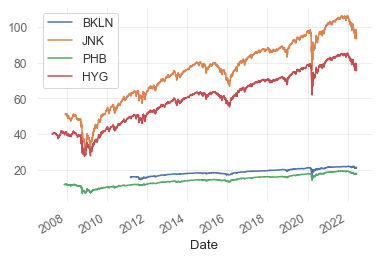

In [267]:
closeyf_hy.plot()

HYG es el que tiene más histórico y encaja mejor por fechas

In [268]:
closeyf_hy.loc[:,'HYG']

Date
2007-04-11    40.048359
2007-04-12    40.075237
2007-04-13    40.002316
2007-04-16    39.986946
2007-04-17    39.967762
                ...    
2022-06-06    78.050003
2022-06-07    78.230003
2022-06-08    77.559998
2022-06-09    76.940002
2022-06-10    75.629997
Name: HYG, Length: 3821, dtype: float64

In [269]:
datayf = yf.download(# tickers list or string as well
        tickers = etf_tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "max",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None)



[*********************100%***********************]  20 of 20 completed


In [270]:
closeyf = datayf.xs('Close',level=1,axis=1)
#closeyf.plot(figsize=(20,10))

In [271]:
closeyf.to_csv('datosCierre.csv')

In [272]:
max_first_valid_index = pd.Timestamp('1900-01-01')
for col_name in closeyf.columns.sort_values():
  data = closeyf[col_name]

  if max_first_valid_index < data.first_valid_index():
    max_first_valid_index = data.first_valid_index()

  print(f"{col_name} --> desde {data.first_valid_index()} hasta {data.last_valid_index()} --> {etfs[(etfs.symbol == col_name) & (etfs.country == 'united states')].name.iloc[0]}")

# Descartamos algún dato, para empezar todo desde el mismo punto
closeyf = closeyf.loc[max_first_valid_index:,]
#closeyf.plot(figsize=(20,10))

GLD --> desde 2004-11-18 00:00:00 hasta 2022-06-10 00:00:00 --> SPDR Gold Shares
HYG --> desde 2007-04-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares iBoxx $ High Yield Corporate Bond
ICF --> desde 2001-02-02 00:00:00 hasta 2022-06-10 00:00:00 --> iShares Cohen & Steers REIT
IEF --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 7-10 Year Treasury Bond
IEI --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 3-7 Year Treasury Bond
IYZ --> desde 2000-05-26 00:00:00 hasta 2022-06-10 00:00:00 --> iShares US Telecommunications
SHV --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares Short Treasury Bond
SHY --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 1-3 Year Treasury Bond
TIP --> desde 2003-12-05 00:00:00 hasta 2022-06-10 00:00:00 --> iShares TIPS Bond
TLH --> desde 2007-01-11 00:00:00 hasta 2022-06-10 00:00:00 --> iShares 10-20 Year Treasury Bond
TLT --> desde 2002-07-30 00:00:00 hasta 2022-06-10 00:00:00 --> iShare

<AxesSubplot:xlabel='Date'>

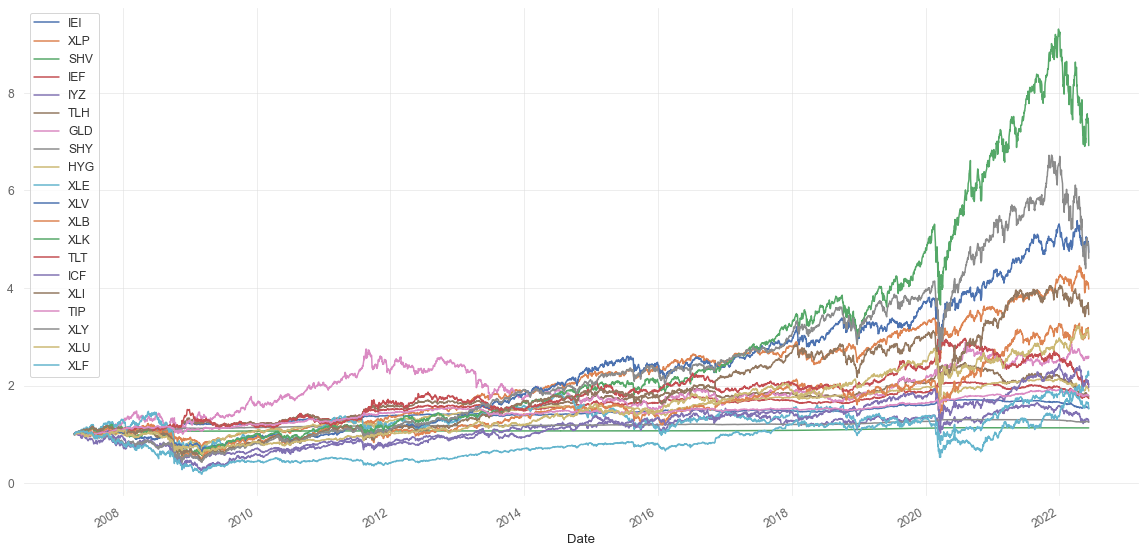

In [273]:
(closeyf/closeyf.iloc[0,]).plot(figsize=(20,10))

In [274]:
# Se calcula en un nuevo DF los retornos logaritmicos
logReturns = pd.DataFrame()
for column in closeyf.columns:
  logReturns[column] = np.log(closeyf[column]/closeyf[column].shift(1)).iloc[1:]

logReturns

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,-0.000200,0.001112,0.000276,0.000971,0.006683,0.001002,-0.001343,-0.000124,0.000670,0.015189,0.011231,0.008804,0.010528,0.000229,-0.007490,0.011993,0.000000,0.006970,-0.004410,-0.001686
2007-04-13,-0.001097,0.003328,0.000183,-0.001699,0.004430,-0.002105,0.012609,-0.000499,-0.001821,0.000476,0.014499,0.002318,0.000838,-0.003095,0.014442,-0.000277,-0.002498,0.000772,-0.000246,0.004210
2007-04-16,0.000698,0.002212,0.000183,0.001093,0.009741,0.003506,0.008221,-0.000125,-0.000384,0.005851,0.009551,0.013286,0.008337,0.005495,-0.002601,0.008009,0.003197,0.009976,0.005877,0.024078
2007-04-17,0.003186,0.009166,0.000092,0.004237,-0.001251,0.004390,-0.005865,0.001622,-0.000480,-0.005692,0.003071,-0.009435,0.002073,0.005577,0.014178,0.000000,0.000598,0.004064,0.004628,-0.000274
2007-04-18,0.001490,-0.002558,0.000640,0.002293,0.002501,0.003081,0.005573,0.001371,0.000288,-0.003495,-0.000279,-0.005395,-0.002489,0.004983,-0.005819,0.002748,0.003284,-0.000761,0.007264,0.011423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004021,0.000406,-0.000182,-0.007536,0.001852,-0.015592,-0.004413,-0.001324,-0.007531,-0.001118,0.000154,0.009417,0.000071,-0.018616,-0.003877,0.004177,-0.006530,0.009950,0.004429,0.002864
2022-06-07,0.001845,0.005267,0.000000,0.004020,0.005534,0.008489,0.006497,0.000120,0.002304,0.029425,0.012932,0.007175,0.011858,0.010742,0.012046,0.013355,0.002379,-0.002462,0.006008,0.007691
2022-06-08,-0.001761,-0.012333,-0.000091,-0.003725,-0.001473,-0.007320,-0.000926,-0.000723,-0.008601,0.002170,-0.007938,-0.020986,-0.011358,-0.008900,-0.024712,-0.018265,-0.002464,-0.005921,-0.019760,-0.017750


In [275]:
closeyf.iloc[0:,:]

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-11,77.098816,18.079159,97.160995,58.035988,20.634251,67.082260,67.080002,65.979858,40.048374,40.212612,26.538858,27.625553,18.941723,56.170341,30.897490,26.281357,65.258156,31.341795,23.870909,21.357561
2007-04-12,77.083435,18.099272,97.187782,58.092342,20.772604,67.149529,66.989998,65.971680,40.075218,40.828068,26.838608,27.869837,19.142202,56.183208,30.666941,26.598448,65.258156,31.560999,23.765881,21.321581
2007-04-13,76.998886,18.159607,97.205574,57.993706,20.864840,67.008354,67.839996,65.938736,40.002319,40.847492,27.230570,27.934509,19.158249,56.009602,31.113047,26.591085,65.095329,31.585361,23.760044,21.411539
2007-04-16,77.052673,18.199821,97.223381,58.057114,21.069073,67.243690,68.400002,65.930466,39.986946,41.087208,27.491894,28.308123,19.318645,56.318245,31.032215,26.804914,65.303741,31.902040,23.900087,21.933334
2007-04-17,77.298553,18.367411,97.232292,58.303619,21.042723,67.539551,68.000000,66.037521,39.967766,40.853985,27.576445,28.042278,19.358738,56.633232,31.475319,26.804914,65.342812,32.031944,24.010946,21.927334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,119.139999,73.849998,110.169998,101.790001,26.877621,119.639999,171.820007,83.010002,78.050003,89.410004,129.839996,87.489998,140.000000,113.889999,64.164543,95.949997,117.540001,154.529999,74.680000,34.970001
2022-06-07,119.360001,74.239998,110.169998,102.199997,27.026775,120.660004,172.940002,83.019997,78.230003,92.080002,131.529999,88.120003,141.669998,115.120003,64.942169,97.239998,117.820000,154.149994,75.129997,35.240002
2022-06-08,119.150002,73.330002,110.160004,101.820000,26.987000,119.779999,172.779999,82.959999,77.559998,92.279999,130.490005,86.290001,140.070007,114.099998,63.356998,95.480003,117.529999,153.240005,73.660004,34.619999


In [276]:
closeyf = closeyf.iloc[1:,:]

Voy a generar un índice sintético:
https://medium.com/python-financial-analysis/python-financial-analysis-4-2-custom-market-index-ef7873926034


Tengo que evitar el índice esté basado en el precio. Si se basa en precio, sólo por cotización unos ETFs pesar´na más que otros y el índice tendrá un sesgo. Esto es así si los pongo en base 1 y equipondero?

In [277]:
closeyf.head(3)

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,77.083435,18.099272,97.187782,58.092342,20.772604,67.149529,66.989998,65.971680,40.075218,40.828068,26.838608,27.869837,19.142202,56.183208,30.666941,26.598448,65.258156,31.560999,23.765881,21.321581
2007-04-13,76.998886,18.159607,97.205574,57.993706,20.864840,67.008354,67.839996,65.938736,40.002319,40.847492,27.230570,27.934509,19.158249,56.009602,31.113047,26.591085,65.095329,31.585361,23.760044,21.411539
2007-04-16,77.052673,18.199821,97.223381,58.057114,21.069073,67.243690,68.400002,65.930466,39.986946,41.087208,27.491894,28.308123,19.318645,56.318245,31.032215,26.804914,65.303741,31.902040,23.900087,21.933334


In [278]:
precio_cero = (closeyf/closeyf.iloc[0,])
precio_cero.head()

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-13,0.998903,1.003334,1.000183,0.998302,1.004440,0.997898,1.012688,0.999501,0.998181,1.000476,1.014604,1.002321,1.000838,0.996910,1.014547,0.999723,0.997505,1.000772,0.999754,1.004219
2007-04-16,0.999601,1.005555,1.000366,0.999394,1.014272,1.001402,1.021048,0.999375,0.997797,1.006347,1.024341,1.015726,1.009217,1.002404,1.011911,1.007762,1.000699,1.010806,1.005647,1.028692
2007-04-17,1.002791,1.014815,1.000458,1.003637,1.013004,1.005808,1.015077,1.000998,0.997319,1.000635,1.027492,1.006187,1.011312,1.008010,1.026360,1.007762,1.001297,1.014922,1.010312,1.028410
2007-04-18,1.004286,1.012223,1.001099,1.005941,1.015541,1.008912,1.020749,1.002372,0.997606,0.997144,1.027205,1.000774,1.008798,1.013045,1.020404,1.010536,1.004591,1.014150,1.017677,1.040225


Calculo el peso de cada ETF

In [279]:
peso = 1/precio_cero.shape[1]
peso

0.05

In [280]:
ew_index_base_cero = np.sum(precio_cero*peso, axis=1)

In [281]:
ew_index_base_cero

Date
2007-04-12    1.000000
2007-04-13    1.002255
2007-04-16    1.008118
2007-04-17    1.009830
2007-04-18    1.011164
                ...   
2022-06-06    2.702261
2022-06-07    2.723911
2022-06-08    2.697011
2022-06-09    2.654220
2022-06-10    2.603756
Length: 3820, dtype: float64

<AxesSubplot:xlabel='Date'>

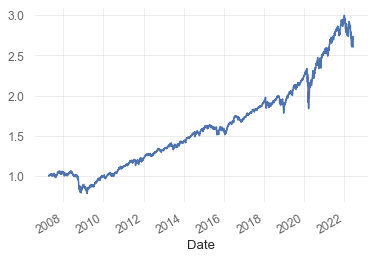

In [282]:
ew_index_base_cero.plot()

Me permite este índice identificar cuáles son los sectores que suben o bajan? Veo dos cosas. La primera es que se identifica la correción del covid (y tiene sentido), o sea que parece que está bien calculado. Lo segundo es que tiene tendencia alcista, porque cuando uno o varios sectores caen, entiendo que el resto tira, pero no veo como sacar info de aquí

Y si hago un índice que vaya teniendo en cuenta los X sectores que más tiran por periodo? Se me ocurre que puedo hacer varios índices y sacar features de cada uno...
En primer lugar, cómo de estables es esa relación de TOP por periodos?

In [283]:
def seleccion_top_X(data, periodo, X):
    '''
       Devuelve df con los activos ordenados por volatildad
       cada día. El índice son fechas, las columnas el orden
       y los valores del DF son los ticker de los activos.

    '''
    data = data.resample(periodo).last()
    # Primero verifico que el df de datos está completo
    rent_activos = np.log(data).diff()
    rent_activos.iloc[0,:] = 0


    ranking = []
    for fila in range(rent_activos.shape[0]):
        ranking.append(rent_activos.iloc[fila, :X].sort_values(ascending=True).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=rent_activos.index)
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Esto es un ranking por rentabilidad

In [284]:
ranking = seleccion_top_X(closeyf,'2M', 5)
ranking

,0,1,2,3,4
Date,,,,,
2007-04-30,IEI,XLP,SHV,IEF,IYZ
2007-06-30,IEF,IEI,XLP,SHV,IYZ
2007-08-31,IYZ,XLP,SHV,IEI,IEF
2007-10-31,IYZ,SHV,IEF,IEI,XLP
2007-12-31,IYZ,SHV,XLP,IEI,IEF
...,...,...,...,...,...
2021-10-31,IYZ,IEF,IEI,XLP,SHV
2021-12-31,IEI,SHV,IEF,IYZ,XLP
2022-02-28,IYZ,XLP,IEF,IEI,SHV


Con esta idea, puedo aplicar distintos ratios (sharpe, jensen, rentabilida_máxima..) y buscar carteras. Estos activos, tendrían etiqueta 1 y el resto 0 en ese periodo.

Ahora tengo un problema. Con estos filtros, en el mismo periodo voy a tener distintas carteras TOP5 y la red no sabrá qué aprender. De momento voy calcular algunos.


Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [285]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [286]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de tading)
beta.head()

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.093605,0.944889,0.001087,0.211383,1.589650,0.280747,1.226701,0.016795,0.069873,1.959667,1.068869,2.003619,1.313487,0.441880,2.226660,1.277768,0.207300,1.526533,1.833448,1.595626
2007-06-11,0.096768,0.939583,0.001198,0.217329,1.592886,0.287893,1.188406,0.018616,0.077237,1.973446,1.032476,2.015208,1.323146,0.452201,2.197824,1.291739,0.216016,1.535700,1.836934,1.594320
2007-06-12,0.136054,0.976709,0.002713,0.274888,1.598625,0.371610,1.114983,0.031613,0.145586,1.962943,0.966549,1.909369,1.330817,0.544344,2.219892,1.325321,0.247877,1.433185,1.836258,1.462855
2007-06-13,0.135909,0.928396,-0.002191,0.279576,1.497043,0.422767,1.086194,0.026868,0.149681,1.956344,0.940734,1.976126,1.305976,0.626572,2.088209,1.439058,0.267126,1.389299,1.853139,1.511196
2007-06-14,0.131633,0.928110,-0.000810,0.275996,1.501685,0.410282,1.074357,0.024532,0.150505,1.999533,0.942275,1.991036,1.329016,0.606387,2.081519,1.435784,0.263016,1.403255,1.849289,1.472028


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [287]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [288]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.000497,0.000822,0.000177,0.000745,0.007807,-0.000871,-0.022584,0.000286,-0.003056,-0.006284,-0.002328,0.008342,0.006927,-0.003184,-0.001878,0.007017,0.000734,0.004652,-0.002590,0.003140
2007-06-11,0.000203,0.005455,0.000091,-0.002615,-0.001748,-0.002689,0.007456,0.000126,-0.002114,0.007642,0.000287,-0.008685,0.001982,-0.002865,-0.017290,0.001303,-0.002140,-0.003291,0.013166,0.004570
2007-06-12,-0.002936,0.000051,0.000118,-0.004459,0.001670,-0.007639,0.001542,-0.000570,-0.003694,0.006768,0.002136,0.006286,0.001075,-0.009285,0.004219,-0.000096,-0.003833,0.005780,0.001418,0.000513
2007-06-13,0.000230,-0.001885,-0.000160,0.000391,-0.006478,0.003386,-0.004468,-0.000025,0.000202,-0.000316,-0.001547,0.002944,-0.000737,0.005397,-0.009147,0.008765,0.000949,-0.002785,0.000698,0.003285
2007-06-14,-0.000825,-0.001509,0.000734,-0.000631,0.002270,-0.002870,-0.002342,-0.000078,0.000292,0.010308,-0.000222,0.001278,0.005163,-0.004457,-0.006638,0.000522,-0.000225,0.002604,0.000344,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004014,0.000757,-0.000181,-0.007524,0.002289,-0.015565,-0.004368,-0.001320,-0.007359,-0.000662,0.000515,0.009870,0.000732,-0.018583,-0.003451,0.004589,-0.006481,0.010669,0.004671,0.003308
2022-06-07,0.001663,-0.002649,-0.000020,0.003688,-0.004316,0.007762,0.005384,0.000018,-0.001559,0.018932,0.004697,-0.003036,-0.003064,0.009835,0.002367,0.004007,0.001261,-0.018497,0.000523,-0.002329
2022-06-08,-0.001529,-0.002310,-0.000067,-0.003341,0.010764,-0.006480,0.000575,-0.000580,-0.003762,0.014707,0.002130,-0.007983,0.007033,-0.007916,-0.012475,-0.006349,-0.001058,0.013912,-0.012849,-0.005020


Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [289]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [290]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-7.100254,5.579397,13.098447,-6.354260,5.052990,-5.329044,17.857828,-9.360784,-3.953982,0.376852,20.416547,2.329648,0.920620,-5.187535,10.874467,-0.307741,-9.884733,0.850067,-0.317078,3.228155
2007-04-16,4.517847,3.708489,13.107280,4.086033,11.109581,8.877243,11.643435,-2.350686,-0.834753,4.636003,13.449225,13.353705,9.160112,9.211478,-1.958769,8.903366,12.647688,10.990402,7.586705,18.461247
2007-04-17,20.612570,15.366951,6.558355,15.842653,-1.427285,11.116322,-8.306915,30.406033,-1.041923,-4.510080,4.324111,-9.483579,2.277766,9.348908,10.675558,0.000000,2.366514,4.476813,5.974215,-0.209793
2007-04-18,9.640299,-4.288009,45.824325,8.572653,2.852992,7.802020,7.892637,25.700018,0.626084,-2.768770,-0.392464,-5.422510,-2.734429,8.351938,-4.381877,3.055013,12.992659,-0.838276,9.377796,8.758235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-26.013675,0.681149,-12.991898,-28.178828,2.111717,-39.479385,-6.250852,-24.817938,-16.354399,-0.885622,0.216804,9.464706,0.078437,-31.203852,-2.919145,4.643860,-25.835489,10.961890,5.717265,2.195754
2022-06-07,11.935902,8.830188,0.000000,15.030660,6.311711,21.496139,9.202207,2.256282,5.002586,23.313293,18.210341,7.211659,13.028178,18.005898,9.070630,14.845875,9.414253,-2.712434,7.755594,5.897192
2022-06-08,-11.392770,-20.676532,-6.491878,-13.928838,-1.679764,-18.534886,-1.310982,-13.548663,-18.679540,1.718980,-11.178378,-21.092823,-12.478915,-14.918018,-18.607350,-20.304418,-9.750964,-6.522674,-25.509434,-13.609873


Por curiosidad hago un resample de 2 meses

In [291]:
test_sharpe =calcula_sharpe(closeyf, 252).resample('2M').last()
test_sharpe.head()

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,19.235068,-6.107036,13.106939,16.203776,-5.727899,13.580111,-9.887481,14.012131,0.205625,-9.445554,-4.671551,-18.566119,-8.515498,17.467952,-5.903525,-13.071107,21.141451,-14.059089,-4.949756,-5.984661
2007-06-30,20.819767,1.860258,19.584476,19.412969,-3.040333,21.045886,0.220266,37.433970,-6.179287,2.761122,-3.982178,6.223876,-3.855724,17.211374,-5.223692,3.993526,23.256935,1.401774,10.151233,-4.226963
2007-08-31,-1.894148,4.368955,-13.041172,0.890410,8.623348,-2.000280,15.413408,0.000000,19.524052,10.392557,6.564912,9.026530,7.196600,1.320634,16.100064,16.763688,-1.564501,17.899131,-2.672922,10.061541
2007-10-31,-22.605878,10.655877,-6.529069,-25.149962,9.562104,-5.669406,23.065610,-29.907019,13.634711,21.039827,8.629616,26.234212,12.841350,-15.206671,11.862147,9.636772,-18.814001,3.312000,14.988093,10.298021
2007-12-31,19.651846,-13.335799,-13.066441,17.228247,-12.678946,13.782196,-9.244731,29.654230,4.747667,-10.119447,-5.175358,-6.007636,-8.211331,10.120439,6.785560,-5.097648,25.887722,-4.035255,-17.869131,-0.264980


Cojo el top5 del primer periodo

In [292]:
test_sharpe.iloc[1, :].sort_values(ascending=False)

SHY    37.433970
TIP    23.256935
TLH    21.045886
IEI    20.819767
SHV    19.584476
IEF    19.412969
TLT    17.211374
XLU    10.151233
XLB     6.223876
XLI     3.993526
XLE     2.761122
XLP     1.860258
XLY     1.401774
GLD     0.220266
IYZ    -3.040333
XLK    -3.855724
XLV    -3.982178
XLF    -4.226963
ICF    -5.223692
HYG    -6.179287
Name: 2007-06-30 00:00:00, dtype: float64

Me parecen raros estos valores, voy a comprobar.

<AxesSubplot:xlabel='Date'>

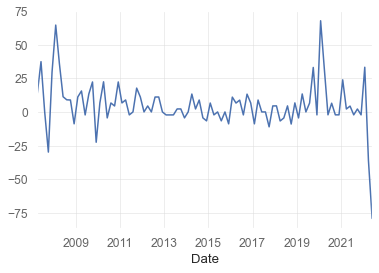

In [293]:
test_sharpe.loc[:, 'SHY'].plot()

<AxesSubplot:xlabel='Date'>

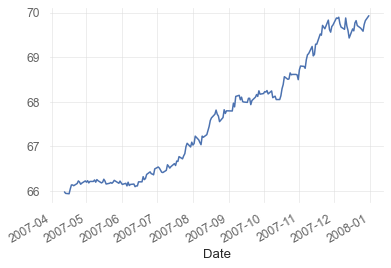

In [294]:
closeyf.loc[:'31-12-2007', 'SHY'].plot()

El cáclulo del ratio de sharpe está bien y viendo los datos tiene sentido...la varaición es muy baja con rentabilidad positiva. Quizá deberíamos contrastar los datos con otra fuente.

Comparo con la primera cartera que tenía por rentabilidad

In [295]:
ranking.iloc[1]

0    IEF
1    IEI
2    XLP
3    SHV
4    IYZ
Name: 2007-06-30 00:00:00, dtype: object

Me hago una función que me ordene un df y me genere carteras seleccionando n_activos.

In [296]:
def seleccion_top_N(data, n_activos):
    ranking = []
    for fila in range(data.shape[0]):
        ranking.append(data.iloc[fila, :].sort_values(ascending=False).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=data.index)
    ranking_df = ranking_df.iloc[:, :5]
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Ahora voy a calcular ratios

Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [297]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [298]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de trading)
beta

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.093605,0.944889,0.001087,0.211383,1.589650,0.280747,1.226701,0.016795,0.069873,1.959667,1.068869,2.003619,1.313487,0.441880,2.226660,1.277768,0.207300,1.526533,1.833448,1.595626
2007-06-11,0.096768,0.939583,0.001198,0.217329,1.592886,0.287893,1.188406,0.018616,0.077237,1.973446,1.032476,2.015208,1.323146,0.452201,2.197824,1.291739,0.216016,1.535700,1.836934,1.594320
2007-06-12,0.136054,0.976709,0.002713,0.274888,1.598625,0.371610,1.114983,0.031613,0.145586,1.962943,0.966549,1.909369,1.330817,0.544344,2.219892,1.325321,0.247877,1.433185,1.836258,1.462855
2007-06-13,0.135909,0.928396,-0.002191,0.279576,1.497043,0.422767,1.086194,0.026868,0.149681,1.956344,0.940734,1.976126,1.305976,0.626572,2.088209,1.439058,0.267126,1.389299,1.853139,1.511196
2007-06-14,0.131633,0.928110,-0.000810,0.275996,1.501685,0.410282,1.074357,0.024532,0.150505,1.999533,0.942275,1.991036,1.329016,0.606387,2.081519,1.435784,0.263016,1.403255,1.849289,1.472028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,0.019757,0.996234,0.002501,0.034696,1.240641,0.075897,0.129185,0.012796,0.486708,1.293518,1.023311,1.287368,1.875542,0.094045,1.207178,1.166187,0.137945,2.037685,0.687089,1.259613
2022-06-07,0.022818,0.991948,0.002445,0.041542,1.234341,0.091166,0.139474,0.012810,0.484038,1.315010,1.031949,1.279560,1.869958,0.113646,1.212946,1.171465,0.140160,2.009357,0.687324,1.255631
2022-06-08,0.023363,1.009884,0.002426,0.038696,1.232992,0.084631,0.151239,0.014407,0.487593,1.263250,1.014463,1.310156,1.853031,0.099128,1.232964,1.200700,0.141696,1.998339,0.696350,1.282719


In [299]:
beta_resample = beta.resample('2M').last()
beta_resample

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.161755,0.816937,-0.000564,0.309700,1.385593,0.470017,0.919123,0.047006,0.192275,2.145652,1.016416,1.875755,1.266870,0.685756,2.132013,1.330207,0.307569,1.197904,2.061721,1.523497
2007-08-31,-0.290419,1.066270,-0.018873,-0.344854,1.731023,-0.350033,0.424857,-0.133385,0.548295,2.301933,1.276160,2.349702,1.598839,-0.362617,2.265577,1.873055,-0.231761,1.996861,2.024997,2.381969
2007-10-31,-0.109870,0.793617,-0.008674,-0.271374,1.434186,-0.161681,0.622379,-0.059592,0.706355,2.519248,1.198911,2.629571,1.413625,-0.347137,2.203477,1.824580,-0.087161,1.890716,1.417358,2.350522
2007-12-31,-0.380407,0.963728,-0.022726,-0.472918,2.372547,-0.534615,0.979903,-0.170003,0.076102,2.937220,1.199289,2.772793,1.843922,-0.613322,2.752538,1.847492,-0.489361,1.767900,1.018002,2.939263
2008-02-29,-0.205451,1.026014,-0.014486,-0.295051,2.326272,-0.261878,0.156444,-0.095774,0.087054,2.603631,0.953557,2.434302,1.846278,-0.250507,3.015784,1.824994,-0.145169,2.146152,1.697213,3.265923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.028259,0.966257,0.001499,0.068494,1.246916,0.163770,0.119176,0.006647,0.319805,1.429350,1.216599,1.577143,1.761262,0.244339,1.174532,1.504187,0.090883,1.362984,0.995047,1.611384
2021-12-31,-0.114619,0.757432,0.002993,-0.236454,0.960687,-0.328962,0.253753,-0.018401,0.444539,1.915874,0.713918,1.303970,2.094103,-0.528273,1.373658,1.587559,0.094211,1.889120,0.842433,1.471708
2022-02-28,0.105175,0.536451,0.004502,0.129441,1.506408,0.131508,-0.005829,0.054820,0.405950,0.379712,1.039040,1.274584,2.099869,0.129001,1.264001,1.211187,0.153905,2.018544,0.801763,1.135016


In [300]:
cartera_beta = seleccion_top_N(beta_resample, 5)
cartera_beta

,0,1,2,3,4
Date,,,,,
2007-06-30,XLE,ICF,XLU,XLB,XLF
2007-08-31,XLF,XLB,XLE,ICF,XLU
2007-10-31,XLB,XLE,XLF,ICF,XLY
2007-12-31,XLF,XLE,XLB,ICF,IYZ
2008-02-29,XLF,ICF,XLE,XLB,IYZ
...,...,...,...,...,...
2021-10-31,XLK,XLF,XLB,XLI,XLE
2021-12-31,XLK,XLE,XLY,XLI,XLF
2022-02-28,XLK,XLY,IYZ,XLB,ICF


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [301]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [302]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.000497,0.000822,0.000177,0.000745,0.007807,-0.000871,-0.022584,0.000286,-0.003056,-0.006284,-0.002328,0.008342,0.006927,-0.003184,-0.001878,0.007017,0.000734,0.004652,-0.002590,0.003140
2007-06-11,0.000203,0.005455,0.000091,-0.002615,-0.001748,-0.002689,0.007456,0.000126,-0.002114,0.007642,0.000287,-0.008685,0.001982,-0.002865,-0.017290,0.001303,-0.002140,-0.003291,0.013166,0.004570
2007-06-12,-0.002936,0.000051,0.000118,-0.004459,0.001670,-0.007639,0.001542,-0.000570,-0.003694,0.006768,0.002136,0.006286,0.001075,-0.009285,0.004219,-0.000096,-0.003833,0.005780,0.001418,0.000513
2007-06-13,0.000230,-0.001885,-0.000160,0.000391,-0.006478,0.003386,-0.004468,-0.000025,0.000202,-0.000316,-0.001547,0.002944,-0.000737,0.005397,-0.009147,0.008765,0.000949,-0.002785,0.000698,0.003285
2007-06-14,-0.000825,-0.001509,0.000734,-0.000631,0.002270,-0.002870,-0.002342,-0.000078,0.000292,0.010308,-0.000222,0.001278,0.005163,-0.004457,-0.006638,0.000522,-0.000225,0.002604,0.000344,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004014,0.000757,-0.000181,-0.007524,0.002289,-0.015565,-0.004368,-0.001320,-0.007359,-0.000662,0.000515,0.009870,0.000732,-0.018583,-0.003451,0.004589,-0.006481,0.010669,0.004671,0.003308
2022-06-07,0.001663,-0.002649,-0.000020,0.003688,-0.004316,0.007762,0.005384,0.000018,-0.001559,0.018932,0.004697,-0.003036,-0.003064,0.009835,0.002367,0.004007,0.001261,-0.018497,0.000523,-0.002329
2022-06-08,-0.001529,-0.002310,-0.000067,-0.003341,0.010764,-0.006480,0.000575,-0.000580,-0.003762,0.014707,0.002130,-0.007983,0.007033,-0.007916,-0.012475,-0.006349,-0.001058,0.013912,-0.012849,-0.005020


In [303]:
alpha_resample = alpha.resample('2M').last()
alpha_resample

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.002939,-0.000302,2.746640e-04,0.004657,-0.005059,0.007500,-0.001432,0.001916,-0.003178,-0.000221,-0.004584,0.002952,-0.005698,0.009083,-0.010620,0.001295,0.005347,-0.000797,0.004302,-0.008145
2007-08-31,0.001511,-0.004018,-6.500699e-05,0.002380,-0.003192,0.001384,0.008244,0.000829,0.005584,-0.001182,-0.003265,-0.005616,-0.003382,0.003040,0.007308,0.003445,0.001044,0.003843,-0.014650,-0.001674
2007-10-31,-0.002741,0.000915,-3.178030e-05,-0.004866,-0.001448,-0.001131,0.012019,-0.001187,0.001436,0.009285,-0.002091,0.008074,0.001997,-0.006692,0.000648,-0.003839,-0.004157,-0.009955,0.001893,-0.002683
2007-12-31,0.002190,-0.005807,-2.332368e-04,0.003554,-0.005831,0.004252,-0.004344,0.001204,0.002356,-0.006228,-0.001003,0.000201,-0.003365,0.004671,0.015145,-0.000469,0.005452,0.000276,-0.011573,0.006203
2008-02-29,0.006243,-0.008684,3.647239e-05,0.007671,-0.008736,0.010298,0.003548,0.002489,-0.002958,-0.007602,-0.004353,-0.008294,-0.002017,0.012669,0.008509,-0.009426,0.008997,-0.003674,-0.012820,-0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-0.000152,-0.000868,-1.808400e-04,0.000444,-0.007059,0.001034,-0.008530,0.000117,-0.002605,-0.006421,0.009830,-0.004619,0.004489,0.003080,-0.010605,0.000465,-0.002551,0.002750,-0.005843,-0.003776
2021-12-31,-0.000297,0.006675,-3.628578e-07,-0.001101,-0.006779,0.002198,0.006778,-0.000115,-0.000284,0.002293,-0.004336,0.004266,-0.005131,0.002023,0.003125,0.004069,-0.001249,-0.002623,0.003397,-0.001969
2022-02-28,0.006184,-0.014296,-9.820439e-05,0.011084,-0.009487,0.019190,0.010322,0.001683,0.000035,0.023743,-0.009336,-0.013591,-0.005346,0.021465,-0.020292,0.005601,0.016951,0.003620,0.003818,-0.016853


Calculo las carteras con alpha de jensen

In [304]:
cartera_alpha = seleccion_top_N(alpha_resample, 5)

Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [305]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [306]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe.head()

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-7.100254,5.579397,13.098447,-6.354260,5.052990,-5.329044,17.857828,-9.360784,-3.953982,0.376852,20.416547,2.329648,0.920620,-5.187535,10.874467,-0.307741,-9.884733,0.850067,-0.317078,3.228155
2007-04-16,4.517847,3.708489,13.107280,4.086033,11.109581,8.877243,11.643435,-2.350686,-0.834753,4.636003,13.449225,13.353705,9.160112,9.211478,-1.958769,8.903366,12.647688,10.990402,7.586705,18.461247
2007-04-17,20.612570,15.366951,6.558355,15.842653,-1.427285,11.116322,-8.306915,30.406033,-1.041923,-4.510080,4.324111,-9.483579,2.277766,9.348908,10.675558,0.000000,2.366514,4.476813,5.974215,-0.209793
2007-04-18,9.640299,-4.288009,45.824325,8.572653,2.852992,7.802020,7.892637,25.700018,0.626084,-2.768770,-0.392464,-5.422510,-2.734429,8.351938,-4.381877,3.055013,12.992659,-0.838276,9.377796,8.758235


Por curiosidad hago un resample de 2 meses

In [307]:
sharpe_resample = calcula_sharpe(closeyf, 252).resample('2M').last()
sharpe_resample.head()

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,19.235068,-6.107036,13.106939,16.203776,-5.727899,13.580111,-9.887481,14.012131,0.205625,-9.445554,-4.671551,-18.566119,-8.515498,17.467952,-5.903525,-13.071107,21.141451,-14.059089,-4.949756,-5.984661
2007-06-30,20.819767,1.860258,19.584476,19.412969,-3.040333,21.045886,0.220266,37.433970,-6.179287,2.761122,-3.982178,6.223876,-3.855724,17.211374,-5.223692,3.993526,23.256935,1.401774,10.151233,-4.226963
2007-08-31,-1.894148,4.368955,-13.041172,0.890410,8.623348,-2.000280,15.413408,0.000000,19.524052,10.392557,6.564912,9.026530,7.196600,1.320634,16.100064,16.763688,-1.564501,17.899131,-2.672922,10.061541
2007-10-31,-22.605878,10.655877,-6.529069,-25.149962,9.562104,-5.669406,23.065610,-29.907019,13.634711,21.039827,8.629616,26.234212,12.841350,-15.206671,11.862147,9.636772,-18.814001,3.312000,14.988093,10.298021
2007-12-31,19.651846,-13.335799,-13.066441,17.228247,-12.678946,13.782196,-9.244731,29.654230,4.747667,-10.119447,-5.175358,-6.007636,-8.211331,10.120439,6.785560,-5.097648,25.887722,-4.035255,-17.869131,-0.264980


Tengo que eliminar la primera fila para que me cuadren las fechas

In [308]:
sharpe_resample = sharpe_resample.iloc[1:, :]
sharpe_resample

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,20.819767,1.860258,19.584476,19.412969,-3.040333,21.045886,0.220266,37.433970,-6.179287,2.761122,-3.982178,6.223876,-3.855724,17.211374,-5.223692,3.993526,23.256935,1.401774,10.151233,-4.226963
2007-08-31,-1.894148,4.368955,-13.041172,0.890410,8.623348,-2.000280,15.413408,0.000000,19.524052,10.392557,6.564912,9.026530,7.196600,1.320634,16.100064,16.763688,-1.564501,17.899131,-2.672922,10.061541
2007-10-31,-22.605878,10.655877,-6.529069,-25.149962,9.562104,-5.669406,23.065610,-29.907019,13.634711,21.039827,8.629616,26.234212,12.841350,-15.206671,11.862147,9.636772,-18.814001,3.312000,14.988093,10.298021
2007-12-31,19.651846,-13.335799,-13.066441,17.228247,-12.678946,13.782196,-9.244731,29.654230,4.747667,-10.119447,-5.175358,-6.007636,-8.211331,10.120439,6.785560,-5.097648,25.887722,-4.035255,-17.869131,-0.264980
2008-02-29,53.737724,-31.829088,13.017344,39.761837,-36.602566,32.732898,2.800690,64.668372,-8.321303,-26.735018,-19.611209,-32.901989,-22.582927,25.452715,-16.393090,-30.847282,41.366690,-27.786241,-38.549561,-25.399965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-1.002222,-1.646373,-12.953055,1.631478,-8.219381,2.570418,-12.101458,2.183949,-5.738361,-5.221406,13.640219,-4.829577,4.703335,5.115135,-8.089737,0.319175,-10.135272,2.851585,-7.694559,-3.041085
2021-12-31,-2.011137,11.343940,0.000000,-4.224343,-7.598989,5.465809,9.642811,-2.187914,-0.498962,2.001070,-5.984197,4.446844,-5.358079,3.283783,2.478327,4.737713,-4.897491,-2.637263,4.516785,-1.373239
2022-02-28,41.156152,-22.455804,-6.485629,42.259126,-7.932060,49.150544,14.605079,33.274057,1.558207,19.316854,-10.686144,-11.506136,-1.994972,36.343565,-13.679430,8.490152,68.093425,7.726184,6.668766,-11.458754


Calulo el top_5

In [309]:
cartera_sharpe = seleccion_top_N(sharpe_resample, 5)
cartera_sharpe

,0,1,2,3,4
Date,,,,,
2007-06-30,SHY,TIP,TLH,IEI,SHV
2007-08-31,HYG,XLY,XLI,ICF,GLD
2007-10-31,XLB,GLD,XLE,XLU,HYG
2007-12-31,SHY,TIP,IEI,IEF,TLH
2008-02-29,SHY,IEI,TIP,IEF,TLH
...,...,...,...,...,...
2021-10-31,XLV,TLT,XLK,XLY,TLH
2021-12-31,XLP,GLD,TLH,XLI,XLU
2022-02-28,TIP,TLH,IEF,IEI,TLT


Comparo con la primera cartera que tenía por rentabilidad

In [310]:
ranking.iloc[1]

0    IEF
1    IEI
2    XLP
3    SHV
4    IYZ
Name: 2007-06-30 00:00:00, dtype: object

Idea. Puedo construir carteras y asigna peso a cada ETF por cada cartera en la que aparezac. Puedo equiponderar y asignar peso/num_carteras

Cuántas carteras hago?
- Jensen
- Sharpe
- Beta
- Momentum
- Media_Movil_Close>Indice equiponderado--> Selecciono los 5 que más se separen porcentualmente de la media.

Qué etiquetas tiene la red?

Momentum

In [311]:

from pandas import Timestamp

def calculate_momentum(data):
    '''Esta función calcula el momentum para un sólo activo.
    En caso de querer aplicarla a un DF, los datos
    deben ser introducidos en bucle for o usada en
    en apply()
    '''
    # Calculo el log de los datos para transformar el dataset. Son precios de cierre en escala log
    # Con esto convierto el problema de la regresión exponencial en lineal.
    # REcuerda que usamos reg exponencial porque viene epresada en %, mientras que la reg lineal, lo están en $
    log_data = np.log(data)

    # Horizontal values
    # Piensa que esto es
    x_data = np.arange(len(log_data))

    # De la regresión, sólo me interesan la pendiente y la precisión:
    beta, _, rvalue, _, _ = linregress(x_data, log_data)

    # Anualizamos la pendiente. Esto tengo que valorarlo en función de cómo quiero que
    # evolucione mi algoritmo. Creo que no me interesa anualizar y trabajar en ventana rodante
    # Si no anualizamos, calcularemos el porcentaje de movimiento por día.
    # Y multiplicamos por la precisión del modelo
    # Al mulitplicar por r2, está filtrando acciones con momentum alto pero mal ajustados
    # R2 = 1 - RSS/TSS
    return  (1+beta)**252*(rvalue**2)

Ahora tengo que calcular el momentum de cada ETF.

In [312]:
def filtro_momentum(data, periodo_momentum, resampling='2M'):
    """Este filtro se basa en una condición de momento positvo
    en ventana rodante.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data, periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo momentum
    momentum = pd.DataFrame(columns = data.columns)

    for stock in data.columns:
        # Voy a recorrer la lista de acciones para calcular su ventana rodante
        # y sobre ese dato, calculo el momento usando apply. PIensa que lo que estás haciend
        # es calcular la regresión exponencial cada X días
        momentum[stock] = data[stock].rolling(periodo_momentum).apply(calculate_momentum, raw=False)

    momentum = momentum.resample('{}'.format(resampling)).last()

    return momentum

In [313]:
momentum = filtro_momentum(closeyf, 252, '2M').dropna(axis=0)
momentum

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.109103,0.301538,1.044140,1.110707,0.529020,1.053578,1.422601,1.072447,0.005881,0.595733,0.404696,0.169783,0.264057,1.005307,0.379496,0.150747,1.121585,0.644783,0.001796,0.581926
2008-06-30,0.899661,0.218391,0.999095,0.908176,0.505068,0.815254,1.151672,0.929557,0.047359,0.725511,0.495135,0.369920,0.308674,0.713292,0.120756,0.277748,1.029273,0.571883,0.065982,0.561821
2008-08-31,0.664669,0.019643,0.959988,0.672062,0.487211,0.566428,0.524573,0.774222,0.259057,0.218193,0.498761,0.017157,0.409694,0.421460,0.151197,0.456221,0.874477,0.534127,0.082288,0.521219
2008-10-31,0.567254,0.137019,0.964615,0.485443,0.397418,0.347623,0.015351,0.739395,0.318000,0.128357,0.466259,0.209571,0.386536,0.382262,0.150298,0.367633,0.043124,0.374532,0.383555,0.454955
2008-12-31,0.584560,0.337983,0.986051,0.457108,0.384330,0.391585,0.393967,0.740127,0.426783,0.296376,0.475475,0.317273,0.381919,0.512775,0.255650,0.388246,0.259368,0.384574,0.444888,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.318897,0.861668,0.757087,0.182219,0.832395,0.124575,0.178921,0.174102,0.908268,1.036176,1.112250,0.893675,1.206444,0.084541,1.319679,0.954980,0.847209,1.028997,0.645001,1.293393
2021-12-31,0.328004,0.927121,0.864792,0.000399,0.252450,0.075854,0.013043,0.558051,0.792512,0.786432,1.037634,0.757973,1.234905,0.190744,1.277113,0.721851,0.915263,1.018417,0.805274,1.040579
2022-02-28,0.431487,0.924160,0.779588,0.013216,0.079107,0.118529,0.112162,0.617546,0.092709,0.840256,0.766719,0.416780,0.952519,0.255052,0.852902,0.218773,0.600643,0.634197,0.676239,0.893721


El problema es que me como un año de histórico...Hay que valorarlo

In [314]:
cartera_momentum = seleccion_top_N(momentum, 5)
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Media móvil. Pongo por defecto un periodo de 252, que es un año de trading y parece un periodo macro razonable. Otra alternativa sería fijar 40 ó 60 días en función de lo que acordemos como marco de referencia y comparar.

In [315]:
def filtro_SMA(data, indice, periodo=252, resampling='2M'):
    """Este filtro se basa en una media móvil simple
    sobre le precio de cierre.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data con precios de cierre, índice con precios de cierre
            periodo_sma y periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo SMA del dataframe de datos
    sma_data = data.rolling(periodo).mean().resample(resampling).last().dropna(axis=0)
    # Ahora mi índice
    sma_index = indice.rolling(252).mean().resample('2M').last().dropna(axis=0)


    sma_distance = sma_data.sub(sma_index, axis=0)

    # return
    return sma_distance

Cómo calculo la distancia a la media del índice:
- Calculo media móvil del precio de cada ETF.
- Calculo media móvil de mi índice sintético.
- Resto mm_etf - mm_índice.
- Ordeno y cojo los 5 que más se separan. No voy a exigir que la dif sea positiva, no quiero los que sean positivos, sino los que mejor se hayan comportado sobre la media; habrá periodos en los que alguno de los top5 sea negativo? O exigo que sea positivo y genero cartera con num_activos <= 5. Esto también tendría sentido si lo que voy a asignar es un peso positivo en cartera a los activos top.

Voy a descojonar el cálculo a ver qué estoy haciendo...

In [316]:
# Calculo un df con la media móvil de los precios de cierre
sma_data = closeyf.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_data

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,81.888406,18.773581,100.018120,61.778193,19.901512,71.021178,77.556270,68.929406,39.998629,47.528088,26.819942,29.662396,20.272926,59.541679,26.392586,28.719353,69.591938,28.720947,23.913328,19.170911
2008-06-30,83.300720,18.901334,100.735801,62.959216,19.105620,72.228079,81.268016,69.752048,40.029273,49.630925,26.262709,30.224280,20.189368,60.558223,25.849837,28.671855,71.142616,27.714045,24.017866,17.936825
2008-08-31,84.705564,19.041127,101.385009,64.177813,18.027872,73.518626,84.982301,70.531026,40.066650,50.422402,25.997603,30.255694,19.789840,61.686194,25.400175,28.116435,72.756067,26.563146,24.029858,16.575352
2008-10-31,86.161076,18.934438,101.980417,65.299560,16.456829,74.687886,86.269682,71.324811,38.965149,48.590922,25.199945,29.039677,18.657545,62.940836,24.112960,26.670684,73.470726,25.077945,23.229503,14.958403
2008-12-31,87.805476,18.414490,102.466169,66.700253,15.030654,76.315309,85.985198,72.068930,37.243528,45.672907,23.959026,26.923775,17.185300,65.103963,22.102624,24.721312,73.265791,23.330728,21.971935,13.261357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,130.095379,67.135239,110.391570,115.199808,31.335988,146.711430,169.363690,85.896930,83.114069,45.700998,120.027985,77.991548,139.151242,144.012085,59.886696,95.871508,119.570077,171.218943,62.751022,33.864863
2021-12-31,129.595111,68.586655,110.376543,114.543519,31.891675,145.263646,168.311230,85.819109,83.769087,49.267595,124.418973,81.204195,147.107221,142.852999,63.203389,99.134428,120.853574,179.652895,63.916723,35.899429
2022-02-28,128.844213,70.453575,110.347762,113.775400,31.956360,144.055241,168.245635,85.622095,83.876161,52.962298,127.125388,83.146644,151.427235,141.847926,65.635536,101.264663,121.416266,182.814937,65.143689,37.316411


In [317]:
# Ahora mi índice
sma_index = ew_index_base_cero.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_index

Date
2008-04-30    1.028861
2008-06-30    1.033107
2008-08-31    1.032524
2008-10-31    1.011873
2008-12-31    0.980847
                ...   
2021-10-31    2.668960
2021-12-31    2.743476
2022-02-28    2.789418
2022-04-30    2.825827
2022-06-30    2.821995
Freq: 2M, Length: 86, dtype: float64

In [318]:
dif = sma_data.sub(sma_index, axis=0)
dif

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,80.859544,17.744720,98.989259,60.749331,18.872651,69.992317,76.527408,67.900545,38.969767,46.499226,25.791081,28.633535,19.244065,58.512817,25.363725,27.690491,68.563076,27.692086,22.884467,18.142050
2008-06-30,82.267613,17.868226,99.702694,61.926109,18.072512,71.194972,80.234908,68.718940,38.996165,48.597818,25.229602,29.191172,19.156261,59.525116,24.816729,27.638748,70.109509,26.680938,22.984759,16.903717
2008-08-31,83.673040,18.008603,100.352485,63.145289,16.995348,72.486102,83.949777,69.498502,39.034126,49.389878,24.965079,29.223170,18.757316,60.653671,24.367651,27.083911,71.723543,25.530622,22.997334,15.542828
2008-10-31,85.149203,17.922564,100.968544,64.287686,15.444955,73.676012,85.257809,70.312938,37.953275,47.579048,24.188071,28.027803,17.645672,61.928963,23.101087,25.658810,72.458853,24.066072,22.217630,13.946529
2008-12-31,86.824629,17.433642,101.485321,65.719406,14.049807,75.334462,85.004351,71.088082,36.262681,44.692059,22.978178,25.942927,16.204453,64.123115,21.121777,23.740465,72.284944,22.349880,20.991088,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,127.426418,64.466279,107.722610,112.530848,28.667027,144.042470,166.694730,83.227970,80.445109,43.032038,117.359025,75.322588,136.482282,141.343125,57.217736,93.202548,116.901117,168.549983,60.082062,31.195902
2021-12-31,126.851635,65.843179,107.633067,111.800043,29.148199,142.520170,165.567754,83.075632,81.025611,46.524119,121.675497,78.460718,144.363745,140.109523,60.459912,96.390952,118.110098,176.909419,61.173247,33.155953
2022-02-28,126.054795,67.664158,107.558344,110.985982,29.166943,141.265823,165.456217,82.832677,81.086743,50.172880,124.335971,80.357227,148.637818,139.058509,62.846119,98.475245,118.626848,180.025520,62.354271,34.526994


In [319]:
media = filtro_SMA(closeyf, ew_index_base_cero, 252, '2M')
media

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,80.859544,17.744720,98.989259,60.749331,18.872651,69.992317,76.527408,67.900545,38.969767,46.499226,25.791081,28.633535,19.244065,58.512817,25.363725,27.690491,68.563076,27.692086,22.884467,18.142050
2008-06-30,82.267613,17.868226,99.702694,61.926109,18.072512,71.194972,80.234908,68.718940,38.996165,48.597818,25.229602,29.191172,19.156261,59.525116,24.816729,27.638748,70.109509,26.680938,22.984759,16.903717
2008-08-31,83.673040,18.008603,100.352485,63.145289,16.995348,72.486102,83.949777,69.498502,39.034126,49.389878,24.965079,29.223170,18.757316,60.653671,24.367651,27.083911,71.723543,25.530622,22.997334,15.542828
2008-10-31,85.149203,17.922564,100.968544,64.287686,15.444955,73.676012,85.257809,70.312938,37.953275,47.579048,24.188071,28.027803,17.645672,61.928963,23.101087,25.658810,72.458853,24.066072,22.217630,13.946529
2008-12-31,86.824629,17.433642,101.485321,65.719406,14.049807,75.334462,85.004351,71.088082,36.262681,44.692059,22.978178,25.942927,16.204453,64.123115,21.121777,23.740465,72.284944,22.349880,20.991088,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,127.426418,64.466279,107.722610,112.530848,28.667027,144.042470,166.694730,83.227970,80.445109,43.032038,117.359025,75.322588,136.482282,141.343125,57.217736,93.202548,116.901117,168.549983,60.082062,31.195902
2021-12-31,126.851635,65.843179,107.633067,111.800043,29.148199,142.520170,165.567754,83.075632,81.025611,46.524119,121.675497,78.460718,144.363745,140.109523,60.459912,96.390952,118.110098,176.909419,61.173247,33.155953
2022-02-28,126.054795,67.664158,107.558344,110.985982,29.166943,141.265823,165.456217,82.832677,81.086743,50.172880,124.335971,80.357227,148.637818,139.058509,62.846119,98.475245,118.626848,180.025520,62.354271,34.526994


In [320]:
cartera_media = seleccion_top_N(media, 5)
cartera_media

,0,1,2,3,4
Date,,,,,
2008-04-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-08-31,SHV,GLD,IEI,TLH,TIP
2008-10-31,SHV,GLD,IEI,TLH,TIP
2008-12-31,SHV,IEI,GLD,TLH,TIP
...,...,...,...,...,...
2021-10-31,XLY,GLD,TLH,TLT,XLK
2021-12-31,XLY,GLD,XLK,TLH,TLT
2022-02-28,XLY,GLD,XLK,TLH,TLT


Cojo como fecha de partida para comparar el 30/06/2008, que sería la primera fecha que podríamos utilizar con esta propuesta

In [321]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


In [322]:
carteras = pd.DataFrame([cartera_media.iloc[1,:], cartera_momentum.iloc[1, :], cartera_sharpe.iloc[6,:], cartera_alpha.iloc[6, :],                              cartera_beta.iloc[6,:]])
carteras

,0,1,2,3,4
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-06-30,XLU,SHV,IYZ,XLV,XLP
2008-06-30,XLU,IYZ,XLE,XLV,XLI
2008-06-30,ICF,XLB,IYZ,XLE,XLF


Qué sentido tiene esto?? Veo por sectores

"XLB", # Materials. 1998-12-22
"XLE", # Energy. 1998-12-22
"XLF", # Financial. 1998-12-22
"XLI", # Industrial. 1998-12-22
"XLK", # Technology. 1998-12-22
"XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
"XLU", # Utilities. 1998-12-22
"XLV", # Health Care. 1998-12-22
"XLY", # Consumer Discretionary. 1998-12-22
"GLD", # Oro. 2004-11-18 *******************************
"SHV", # Short Treasury Bond. 2007-01-11 ***************
"SHY", # 1-3 Year Treasury Bond. 2002-07-30
"IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
"IEF", # 7-10 Year Treasury Bond. 2002-07-30
"TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
"TLT", # +20 Year Treasury Bond. 2002-07-30
"TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
"ICF", # Inmobiliario. 2001-02-02
"IYZ", # Telecomunicaciones. 2000-05-22
'HYG' # High Yield. 2007


 Cartera SMA es una cartera que pondera la renta fija. Tiene sentido si pienso que venimos de la crisis de 2007 y todavía no se ha alterado la política monetaria.

In [323]:
#
carteras.iloc[0,:]
# Renta fija  a corot plazo (SHV)
# Renta fija medio plazo (IEI)
# Gold
# Renta fija largo plazo (TLH)
# Renta fija ligada a inflación (TIP)

0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object

Momentum: idem..cartera que pondera la renta fija

In [324]:
carteras.iloc[1,:]
# Gold
# Renta fija a inflación (TIP)
# Renta fija a corto (SHV)
# Deuda a 3 años (SHY)
# DEdua 7 años


0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object

Cartera Sharpe: Creo que esta cartera está viendo otra fase del ciclo. Ver donde encajan utilities, teleco, Helath Care...

In [325]:

carteras.iloc[2,:]
# Utilities (xlu)
# Renta fija a corto (SHV)
# Telecomunicaciones (IYZ)
# Health Care (XLV)
# Consumer Saples (XLP)

0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object

Alpha:

In [326]:
carteras.iloc[3,:]
# Utilities (xlu)
# Telecomunicaciones (IYZ)
# Energia (XLE)
# Health Care (XLV)
# Industrial (XLI)


0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object

Beta: esta cartera aunque parezca rara, tiene mucho sentido...En plena crisis inmobiliaria y de crédito pondera inmobiliario, materiales y servicios financieros...pero al final, estamos cogiendo los movimientos mas fuertes en sentido de mercado...Qué beta tienen estos activos?

In [327]:
beta_resample.loc['2008-06-30',:].sort_values(ascending=False)

ICF    2.577390
XLB    2.564416
IYZ    2.397983
XLE    2.261675
XLF    2.222885
XLY    2.152484
XLK    2.052361
XLI    1.817745
XLU    1.454579
XLP    1.445242
XLV    1.389462
HYG    0.283071
SHV   -0.001660
SHY   -0.042321
IEI   -0.139927
GLD   -0.149719
TIP   -0.175566
IEF   -0.202904
TLT   -0.244020
TLH   -0.250795
Name: 2008-06-30 00:00:00, dtype: float64

In [328]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo. Quizá se podría hacer un backtest, pero no sé si aportaría algo.

Ideal del avión:

Con cada cartera construyo un índice sintético y cojo sus retornos. Creo un DF con los retornos de las 5 carteras y los retornos del índice que he creado equiponderado. Ahora calculo la covarianza de cada cartera con los retornos del índice equiponderado. Teniendo en cuenta el ruido que tienen los datos de cotización, me conformaría con ver valores de correlación bajos pero significativos. Sería de alguna manera como intentar ver qué porcentaje del retorno del índice EW corresponde a la cartera

Retomo las carteras que tengo

In [329]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


Me voy a hacer na función a la que le pase la cartera y me calcle el índice

In [330]:
momentum

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.109103,0.301538,1.044140,1.110707,0.529020,1.053578,1.422601,1.072447,0.005881,0.595733,0.404696,0.169783,0.264057,1.005307,0.379496,0.150747,1.121585,0.644783,0.001796,0.581926
2008-06-30,0.899661,0.218391,0.999095,0.908176,0.505068,0.815254,1.151672,0.929557,0.047359,0.725511,0.495135,0.369920,0.308674,0.713292,0.120756,0.277748,1.029273,0.571883,0.065982,0.561821
2008-08-31,0.664669,0.019643,0.959988,0.672062,0.487211,0.566428,0.524573,0.774222,0.259057,0.218193,0.498761,0.017157,0.409694,0.421460,0.151197,0.456221,0.874477,0.534127,0.082288,0.521219
2008-10-31,0.567254,0.137019,0.964615,0.485443,0.397418,0.347623,0.015351,0.739395,0.318000,0.128357,0.466259,0.209571,0.386536,0.382262,0.150298,0.367633,0.043124,0.374532,0.383555,0.454955
2008-12-31,0.584560,0.337983,0.986051,0.457108,0.384330,0.391585,0.393967,0.740127,0.426783,0.296376,0.475475,0.317273,0.381919,0.512775,0.255650,0.388246,0.259368,0.384574,0.444888,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.318897,0.861668,0.757087,0.182219,0.832395,0.124575,0.178921,0.174102,0.908268,1.036176,1.112250,0.893675,1.206444,0.084541,1.319679,0.954980,0.847209,1.028997,0.645001,1.293393
2021-12-31,0.328004,0.927121,0.864792,0.000399,0.252450,0.075854,0.013043,0.558051,0.792512,0.786432,1.037634,0.757973,1.234905,0.190744,1.277113,0.721851,0.915263,1.018417,0.805274,1.040579
2022-02-28,0.431487,0.924160,0.779588,0.013216,0.079107,0.118529,0.112162,0.617546,0.092709,0.840256,0.766719,0.416780,0.952519,0.255052,0.852902,0.218773,0.600643,0.634197,0.676239,0.893721


In [331]:
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Cojo los precios de cierre de los precios en base cero

In [332]:
precio_cero

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2007-04-13,0.998903,1.003334,1.000183,0.998302,1.004440,0.997898,1.012688,0.999501,0.998181,1.000476,1.014604,1.002321,1.000838,0.996910,1.014547,0.999723,0.997505,1.000772,0.999754,1.004219
2007-04-16,0.999601,1.005555,1.000366,0.999394,1.014272,1.001402,1.021048,0.999375,0.997797,1.006347,1.024341,1.015726,1.009217,1.002404,1.011911,1.007762,1.000699,1.010806,1.005647,1.028692
2007-04-17,1.002791,1.014815,1.000458,1.003637,1.013004,1.005808,1.015077,1.000998,0.997319,1.000635,1.027492,1.006187,1.011312,1.008010,1.026360,1.007762,1.001297,1.014922,1.010312,1.028410
2007-04-18,1.004286,1.012223,1.001099,1.005941,1.015541,1.008912,1.020749,1.002372,0.997606,0.997144,1.027205,1.000774,1.008798,1.013045,1.020404,1.010536,1.004591,1.014150,1.017677,1.040225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,1.545598,4.080275,1.133579,1.752210,1.293898,1.781695,2.564861,1.258267,1.947588,2.189915,4.837807,3.139236,7.313683,2.027118,2.092303,3.607353,1.801154,4.896233,3.142320,1.640122
2022-06-07,1.548452,4.101822,1.133579,1.759268,1.301078,1.796885,2.581579,1.258419,1.952079,2.255311,4.900776,3.161841,7.400925,2.049011,2.117661,3.655852,1.805445,4.884192,3.161255,1.652786
2022-06-08,1.545728,4.051544,1.133476,1.752727,1.299163,1.783780,2.579191,1.257509,1.935361,2.260210,4.862026,3.096179,7.317340,2.030856,2.065971,3.589683,1.801001,4.855360,3.099401,1.623707


Resample

In [333]:
resample_period = '2M'

In [334]:
precio_cero_resample = precio_cero.resample(resample_period).last()
precio_cero_resample

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,1.007376,1.014815,1.002107,1.009578,1.007929,1.011016,1.001493,1.003745,1.011397,1.005554,1.034078,0.995617,1.023042,1.015563,1.017085,1.031328,1.011378,1.001544,1.022588,1.041069
2007-06-30,1.000128,1.008024,1.011201,0.990854,1.073515,0.987876,0.959397,1.007833,0.983167,1.097911,1.016620,1.048788,1.073229,0.982011,0.890220,1.085128,0.995970,1.013622,0.978486,1.023285
2007-08-31,1.035349,1.002434,1.021620,1.036145,1.056955,1.031253,0.992984,1.027611,0.994104,1.111279,0.990420,1.013828,1.091676,1.032741,0.878809,1.095690,1.027261,0.959500,0.954259,0.954557
2007-10-31,1.048492,1.064602,1.028943,1.048228,1.034415,1.053088,1.173608,1.038222,1.028055,1.223820,1.040389,1.141004,1.192994,1.053897,0.932018,1.132797,1.052548,0.946412,1.056842,0.961050
2007-12-31,1.086459,1.084753,1.037269,1.091208,0.949603,1.089835,1.230930,1.060001,1.015658,1.269363,1.023884,1.095130,1.125066,1.103325,0.795041,1.099202,1.096574,0.850447,1.061884,0.831796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,1.664924,3.892165,1.135244,1.957831,1.509922,2.175114,2.487685,1.297118,2.107134,1.376451,4.951567,3.027398,8.406955,2.599084,2.262081,3.900683,1.895219,6.354080,2.774882,1.871900
2021-12-31,1.663074,4.241155,1.135038,1.968841,1.567036,2.192811,2.552023,1.293626,2.130068,1.346479,5.233203,3.238988,9.066319,2.617327,2.465359,3.964861,1.919316,6.467678,2.991890,1.824340
2022-02-28,1.631674,4.119602,1.133702,1.921377,1.432760,2.101098,2.662786,1.279152,2.055705,1.712334,4.827220,2.980541,8.033864,2.473819,2.138719,3.743030,1.895886,5.613188,2.839328,1.799579


Recorro las fechas de la cartera y cojo la misma fecha del DF de datos_cero



In [335]:
synthetic_index = pd.DataFrame(np.zeros((cartera_momentum.shape[0], cartera_momentum.shape[1])), index=cartera_momentum.index)
for idx in cartera_momentum.index:
    # Selecciono los activos de la cartera
    activos = cartera_momentum.loc[idx].tolist()

    # Cojo los precios del df de precios para esos activos

    for i in range(len(activos)):
        synthetic_index.loc[idx, i] = precio_cero_resample.loc[idx, activos[i]]

# Ahora ya tengo un DF con los datos en base_cero de mis carteras.
# Construyo el índice
peso = 1/synthetic_index.shape[1]
syn_index = np.sum(synthetic_index*peso, axis=1)
syn_index_returns = np.log(syn_index).diff().dropna(axis=0)








In [336]:
syn_index_returns

Date
2008-06-30    0.003239
2008-08-31   -0.033795
2008-10-31   -0.061519
2008-12-31    0.079551
2009-02-28    0.034294
                ...   
2021-10-31    0.085926
2021-12-31    0.283631
2022-02-28   -0.341721
2022-04-30   -0.435635
2022-06-30   -0.236615
Length: 80, dtype: float64

<AxesSubplot:xlabel='Date'>

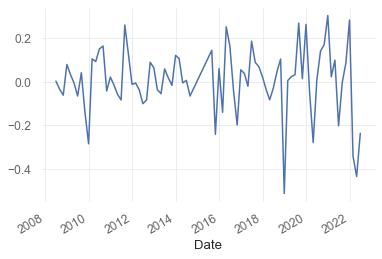

In [337]:
syn_index_returns.plot()

<AxesSubplot:xlabel='Date'>

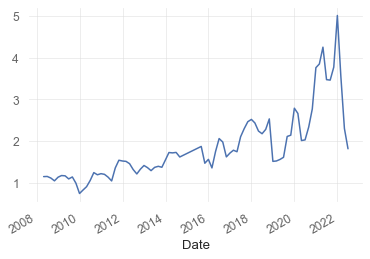

In [338]:
syn_index.plot()

In [339]:
synthetic_index

,0,1,2,3,4
Date,,,,,
2008-04-30,1.293477,1.134198,1.129104,1.118176,1.082295
2008-06-30,1.364383,1.155728,1.052876,1.081196,1.121743
2008-08-31,1.056709,1.157651,1.090956,1.147074,1.131599
2008-10-31,1.062046,1.111587,1.159677,1.135580,0.781931
2008-12-31,1.066722,1.130201,1.225534,1.477923,0.785216
...,...,...,...,...,...
2021-10-31,2.262081,1.871900,8.406955,4.951567,1.376451
2021-12-31,2.465359,9.066319,1.824340,5.233203,6.467678
2022-02-28,8.033864,4.119602,1.799579,2.138719,1.712334


In [340]:
def calcular_indice(cartera, data_precio):
    """
    Voy a equiponderar los pesos de cada activo
    en cartera.
    :return: índice sintético y retornos
    """
    synthetic_index = pd.DataFrame(np.zeros((cartera.shape[0], cartera.shape[1])), index=cartera.index)
    for idx in cartera.index:
        # Selecciono los activos de la cartera
        activos = cartera.loc[idx].tolist()

        # Cojo los precios del df de precios para esos activos

        for i in range(len(activos)):
            synthetic_index.loc[idx, i] = data_precio.loc[idx, activos[i]]

    # Ahora ya tengo un DF con los datos en base_cero de mis carteras.
    # Construyo el índice
    peso = 1/synthetic_index.shape[1]
    syn_index = np.sum(synthetic_index*peso, axis=1)
    syn_index_returns = np.log(syn_index).diff().dropna(axis=0)

    return syn_index, syn_index_returns

In [341]:
a, b = calcular_indice(cartera_sharpe, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

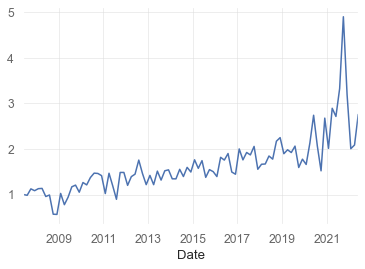

In [342]:
a.plot()

<AxesSubplot:xlabel='Date'>

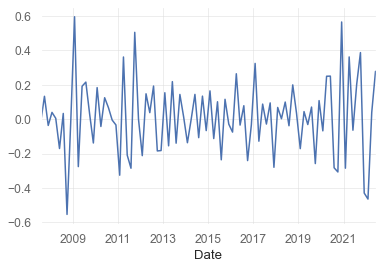

In [343]:
b.plot()

Llegado aquí, verfica si comparas retornos o precios

Haz un df con precios y otro con retornos

In [344]:
# Actauliza

In [345]:
# Momentum
momentum_index, momentum_returns = calcular_indice(cartera_momentum, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

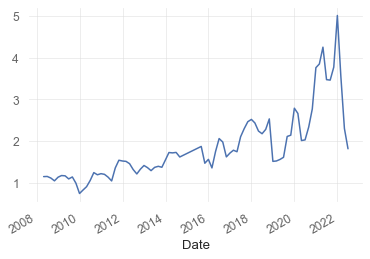

In [346]:
momentum_index.plot()

<AxesSubplot:xlabel='Date'>

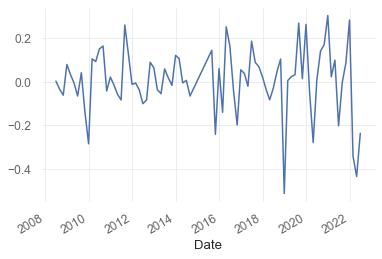

In [347]:
momentum_returns.plot()

<AxesSubplot:xlabel='Date'>

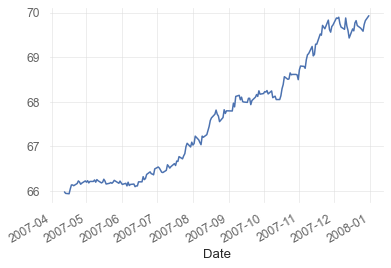

In [348]:
closeyf.loc[:'31-12-2007', 'SHY'].plot()

El cáclulo del ratio de sharpe está bien y viendo los datos tiene sentido...la varaición es muy baja con rentabilidad positiva. Quizá deberíamos contrastar los datos con otra fuente.

Comparo con la primera cartera que tenía por rentabilidad

In [349]:
ranking.iloc[1]

0    IEF
1    IEI
2    XLP
3    SHV
4    IYZ
Name: 2007-06-30 00:00:00, dtype: object

Me hago una función que me ordene un df y me genere carteras seleccionando n_activos.

In [350]:
def seleccion_top_N(data, n_activos):
    ranking = []
    for fila in range(data.shape[0]):
        ranking.append(data.iloc[fila, :].sort_values(ascending=False).index)
        #print(ranking)
        #print("Hola")
        #ranking[fila] = ranking[fila].sort_values()

    ranking_df = pd.DataFrame(ranking, index=data.index)
    ranking_df = ranking_df.iloc[:, :5]
    # ranking_df.sort_values(,ascending=True)

    return ranking_df

Ahora voy a calcular ratios

Calculo la Beta

beta = cov(rent_i, rent_mercado)/var(rent_mercado)

In [351]:
def calcular_beta(data, indice, periodo):

    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    return beta.iloc[periodo:,:]

In [352]:
beta = calcular_beta(closeyf, ew_index_base_cero, 40) # Tomo como reerncia 2M (40 días de trading)
beta

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,0.093605,0.944889,0.001087,0.211383,1.589650,0.280747,1.226701,0.016795,0.069873,1.959667,1.068869,2.003619,1.313487,0.441880,2.226660,1.277768,0.207300,1.526533,1.833448,1.595626
2007-06-11,0.096768,0.939583,0.001198,0.217329,1.592886,0.287893,1.188406,0.018616,0.077237,1.973446,1.032476,2.015208,1.323146,0.452201,2.197824,1.291739,0.216016,1.535700,1.836934,1.594320
2007-06-12,0.136054,0.976709,0.002713,0.274888,1.598625,0.371610,1.114983,0.031613,0.145586,1.962943,0.966549,1.909369,1.330817,0.544344,2.219892,1.325321,0.247877,1.433185,1.836258,1.462855
2007-06-13,0.135909,0.928396,-0.002191,0.279576,1.497043,0.422767,1.086194,0.026868,0.149681,1.956344,0.940734,1.976126,1.305976,0.626572,2.088209,1.439058,0.267126,1.389299,1.853139,1.511196
2007-06-14,0.131633,0.928110,-0.000810,0.275996,1.501685,0.410282,1.074357,0.024532,0.150505,1.999533,0.942275,1.991036,1.329016,0.606387,2.081519,1.435784,0.263016,1.403255,1.849289,1.472028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,0.019757,0.996234,0.002501,0.034696,1.240641,0.075897,0.129185,0.012796,0.486708,1.293518,1.023311,1.287368,1.875542,0.094045,1.207178,1.166187,0.137945,2.037685,0.687089,1.259613
2022-06-07,0.022818,0.991948,0.002445,0.041542,1.234341,0.091166,0.139474,0.012810,0.484038,1.315010,1.031949,1.279560,1.869958,0.113646,1.212946,1.171465,0.140160,2.009357,0.687324,1.255631
2022-06-08,0.023363,1.009884,0.002426,0.038696,1.232992,0.084631,0.151239,0.014407,0.487593,1.263250,1.014463,1.310156,1.853031,0.099128,1.232964,1.200700,0.141696,1.998339,0.696350,1.282719


In [353]:
beta_resample = beta.resample('2M').last()
beta_resample

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.161755,0.816937,-0.000564,0.309700,1.385593,0.470017,0.919123,0.047006,0.192275,2.145652,1.016416,1.875755,1.266870,0.685756,2.132013,1.330207,0.307569,1.197904,2.061721,1.523497
2007-08-31,-0.290419,1.066270,-0.018873,-0.344854,1.731023,-0.350033,0.424857,-0.133385,0.548295,2.301933,1.276160,2.349702,1.598839,-0.362617,2.265577,1.873055,-0.231761,1.996861,2.024997,2.381969
2007-10-31,-0.109870,0.793617,-0.008674,-0.271374,1.434186,-0.161681,0.622379,-0.059592,0.706355,2.519248,1.198911,2.629571,1.413625,-0.347137,2.203477,1.824580,-0.087161,1.890716,1.417358,2.350522
2007-12-31,-0.380407,0.963728,-0.022726,-0.472918,2.372547,-0.534615,0.979903,-0.170003,0.076102,2.937220,1.199289,2.772793,1.843922,-0.613322,2.752538,1.847492,-0.489361,1.767900,1.018002,2.939263
2008-02-29,-0.205451,1.026014,-0.014486,-0.295051,2.326272,-0.261878,0.156444,-0.095774,0.087054,2.603631,0.953557,2.434302,1.846278,-0.250507,3.015784,1.824994,-0.145169,2.146152,1.697213,3.265923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.028259,0.966257,0.001499,0.068494,1.246916,0.163770,0.119176,0.006647,0.319805,1.429350,1.216599,1.577143,1.761262,0.244339,1.174532,1.504187,0.090883,1.362984,0.995047,1.611384
2021-12-31,-0.114619,0.757432,0.002993,-0.236454,0.960687,-0.328962,0.253753,-0.018401,0.444539,1.915874,0.713918,1.303970,2.094103,-0.528273,1.373658,1.587559,0.094211,1.889120,0.842433,1.471708
2022-02-28,0.105175,0.536451,0.004502,0.129441,1.506408,0.131508,-0.005829,0.054820,0.405950,0.379712,1.039040,1.274584,2.099869,0.129001,1.264001,1.211187,0.153905,2.018544,0.801763,1.135016


In [354]:
cartera_beta = seleccion_top_N(beta_resample, 5)
cartera_beta

,0,1,2,3,4
Date,,,,,
2007-06-30,XLE,ICF,XLU,XLB,XLF
2007-08-31,XLF,XLB,XLE,ICF,XLU
2007-10-31,XLB,XLE,XLF,ICF,XLY
2007-12-31,XLF,XLE,XLB,ICF,IYZ
2008-02-29,XLF,ICF,XLE,XLB,IYZ
...,...,...,...,...,...
2021-10-31,XLK,XLF,XLB,XLI,XLE
2021-12-31,XLK,XLE,XLY,XLI,XLF
2022-02-28,XLK,XLY,IYZ,XLB,ICF


Me puede interesar buscar o filtar los ETFs con Beta positiva máxima. Esto me va a indicar que activos se han movido más que el mercado. Si pienso en que busco los activos que "amplifican" el valor del mercado en la dirección del movimineto, debería estar obteniendo los valores que más tiran de mi índice sintético

Alfa de Jensen

alpha = (rentabilidad_cartera -fisk_free) - Beta*(rentabilidad_mercado - risk_free)

In [355]:
def calcular_alfa_jensen(data, indice, periodo):
    '''Supongo la rentabilidad del activo libre
    de riesgo '0'. POr eso no cosidero éste activo en
    el cálculo. Voy a calcular la alfa de cada activo
    sólo sobre el índice.
    '''
    # No Llamo a la función calcular Beta porque necesito las tripas
    activos = data

    # Generamos las matrices de datos donde guardaremos los resultados.
    rent_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    alpha_activos=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)
    rent_indice=pd.DataFrame(np.zeros(len(indice)))

    # Calculamos la rentabilidad de los activos e índice.
    rent_activos = np.log(activos).diff()
    rent_indice = np.log(indice).diff()
    rent_activos.iloc[:1]=0
    rent_indice.iloc[0]=0 # Elimina el primer NaN sustituéndolo por 0

    # Calculamos la varianza del DAX
    varianza_indice = rent_indice.rolling(periodo).var()

    # Calculamos la covarianza del DAX y activos
    cov_act_ind=pd.DataFrame(np.zeros((activos.shape[0] , activos.shape[1])), index=activos.index, columns=activos.columns)

    # Recorro la matriz y calculo
    for activo in activos.columns:
        cov_act_ind.loc[:,activo] = rent_indice.rolling(periodo).cov(rent_activos.loc[:,activo])

    # Dataframe Beta
    beta=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)

    # Sacamos la Beta del activo. β=cov(Rc,Rm)/σRm
    beta[periodo:beta.shape[0]] = cov_act_ind[periodo:rent_indice.shape[0]].div(varianza_indice[periodo:rent_indice.shape[0]], axis=0)

    # Ahora calculo alfa:
    alpha=pd.DataFrame(np.zeros((cov_act_ind.shape[0] , cov_act_ind.shape[1])), index=cov_act_ind.index, columns=cov_act_ind.columns)
    Rfactivos=pd.DataFrame(np.ones((beta.shape[0] , beta.shape[1])), index=beta.index, columns=beta.columns)

     # Calculamos el Alpha del activo. α=Rc-(Rf+β(Rm-Rf))
    alpha[periodo:alpha.shape[0]] = (rent_activos[periodo:rent_activos.shape[0]] -
                                beta[periodo:beta.shape[0]].mul(rent_indice[periodo:rent_activos.shape[0]], axis=0)
                                )

    alpha=alpha[periodo:alpha.shape[0]]

    return alpha

In [356]:
alpha = calcular_alfa_jensen(closeyf, ew_index_base_cero, 40)
alpha

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-08,-0.000497,0.000822,0.000177,0.000745,0.007807,-0.000871,-0.022584,0.000286,-0.003056,-0.006284,-0.002328,0.008342,0.006927,-0.003184,-0.001878,0.007017,0.000734,0.004652,-0.002590,0.003140
2007-06-11,0.000203,0.005455,0.000091,-0.002615,-0.001748,-0.002689,0.007456,0.000126,-0.002114,0.007642,0.000287,-0.008685,0.001982,-0.002865,-0.017290,0.001303,-0.002140,-0.003291,0.013166,0.004570
2007-06-12,-0.002936,0.000051,0.000118,-0.004459,0.001670,-0.007639,0.001542,-0.000570,-0.003694,0.006768,0.002136,0.006286,0.001075,-0.009285,0.004219,-0.000096,-0.003833,0.005780,0.001418,0.000513
2007-06-13,0.000230,-0.001885,-0.000160,0.000391,-0.006478,0.003386,-0.004468,-0.000025,0.000202,-0.000316,-0.001547,0.002944,-0.000737,0.005397,-0.009147,0.008765,0.000949,-0.002785,0.000698,0.003285
2007-06-14,-0.000825,-0.001509,0.000734,-0.000631,0.002270,-0.002870,-0.002342,-0.000078,0.000292,0.010308,-0.000222,0.001278,0.005163,-0.004457,-0.006638,0.000522,-0.000225,0.002604,0.000344,-0.006292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,-0.004014,0.000757,-0.000181,-0.007524,0.002289,-0.015565,-0.004368,-0.001320,-0.007359,-0.000662,0.000515,0.009870,0.000732,-0.018583,-0.003451,0.004589,-0.006481,0.010669,0.004671,0.003308
2022-06-07,0.001663,-0.002649,-0.000020,0.003688,-0.004316,0.007762,0.005384,0.000018,-0.001559,0.018932,0.004697,-0.003036,-0.003064,0.009835,0.002367,0.004007,0.001261,-0.018497,0.000523,-0.002329
2022-06-08,-0.001529,-0.002310,-0.000067,-0.003341,0.010764,-0.006480,0.000575,-0.000580,-0.003762,0.014707,0.002130,-0.007983,0.007033,-0.007916,-0.012475,-0.006349,-0.001058,0.013912,-0.012849,-0.005020


In [357]:
alpha_resample = alpha.resample('2M').last()
alpha_resample

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,0.002939,-0.000302,2.746640e-04,0.004657,-0.005059,0.007500,-0.001432,0.001916,-0.003178,-0.000221,-0.004584,0.002952,-0.005698,0.009083,-0.010620,0.001295,0.005347,-0.000797,0.004302,-0.008145
2007-08-31,0.001511,-0.004018,-6.500699e-05,0.002380,-0.003192,0.001384,0.008244,0.000829,0.005584,-0.001182,-0.003265,-0.005616,-0.003382,0.003040,0.007308,0.003445,0.001044,0.003843,-0.014650,-0.001674
2007-10-31,-0.002741,0.000915,-3.178030e-05,-0.004866,-0.001448,-0.001131,0.012019,-0.001187,0.001436,0.009285,-0.002091,0.008074,0.001997,-0.006692,0.000648,-0.003839,-0.004157,-0.009955,0.001893,-0.002683
2007-12-31,0.002190,-0.005807,-2.332368e-04,0.003554,-0.005831,0.004252,-0.004344,0.001204,0.002356,-0.006228,-0.001003,0.000201,-0.003365,0.004671,0.015145,-0.000469,0.005452,0.000276,-0.011573,0.006203
2008-02-29,0.006243,-0.008684,3.647239e-05,0.007671,-0.008736,0.010298,0.003548,0.002489,-0.002958,-0.007602,-0.004353,-0.008294,-0.002017,0.012669,0.008509,-0.009426,0.008997,-0.003674,-0.012820,-0.000336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-0.000152,-0.000868,-1.808400e-04,0.000444,-0.007059,0.001034,-0.008530,0.000117,-0.002605,-0.006421,0.009830,-0.004619,0.004489,0.003080,-0.010605,0.000465,-0.002551,0.002750,-0.005843,-0.003776
2021-12-31,-0.000297,0.006675,-3.628578e-07,-0.001101,-0.006779,0.002198,0.006778,-0.000115,-0.000284,0.002293,-0.004336,0.004266,-0.005131,0.002023,0.003125,0.004069,-0.001249,-0.002623,0.003397,-0.001969
2022-02-28,0.006184,-0.014296,-9.820439e-05,0.011084,-0.009487,0.019190,0.010322,0.001683,0.000035,0.023743,-0.009336,-0.013591,-0.005346,0.021465,-0.020292,0.005601,0.016951,0.003620,0.003818,-0.016853


Calculo las carteras con alpha de jensen

In [358]:
cartera_alpha = seleccion_top_N(alpha_resample, 5)

Ratio Sharpe

Sharpe = (rent_i - risk_free)/sigma

In [359]:
def calcula_sharpe(data, periodo_ajuste=252):
    """Voy a calcular el ratio de sharpe con
    retorno log.
    Voy a considerar la rentabilidad del activo libre
    de riesgo igual a 0.

    Por defecto, voy a trabajar en ventana de 6 meses,
    pero dejo input para modificar este valor.
    """
    rent_activos = np.log(data).diff()
    volatilidad = rent_activos.std()
    # sharpe = rent_activos.iloc[ventana:] / volatilidad.iloc[ventana:]
    sharpe = np.sqrt(periodo_ajuste)*(rent_activos / volatilidad)
    sharpe.replace([np.inf, -np.inf], 0, inplace=True)

    return sharpe


In [360]:
sharpe = calcula_sharpe(closeyf, 252)
sharpe.head()

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-13,-7.100254,5.579397,13.098447,-6.354260,5.052990,-5.329044,17.857828,-9.360784,-3.953982,0.376852,20.416547,2.329648,0.920620,-5.187535,10.874467,-0.307741,-9.884733,0.850067,-0.317078,3.228155
2007-04-16,4.517847,3.708489,13.107280,4.086033,11.109581,8.877243,11.643435,-2.350686,-0.834753,4.636003,13.449225,13.353705,9.160112,9.211478,-1.958769,8.903366,12.647688,10.990402,7.586705,18.461247
2007-04-17,20.612570,15.366951,6.558355,15.842653,-1.427285,11.116322,-8.306915,30.406033,-1.041923,-4.510080,4.324111,-9.483579,2.277766,9.348908,10.675558,0.000000,2.366514,4.476813,5.974215,-0.209793
2007-04-18,9.640299,-4.288009,45.824325,8.572653,2.852992,7.802020,7.892637,25.700018,0.626084,-2.768770,-0.392464,-5.422510,-2.734429,8.351938,-4.381877,3.055013,12.992659,-0.838276,9.377796,8.758235


Por curiosidad hago un resample de 2 meses

In [361]:
sharpe_resample = calcula_sharpe(closeyf, 252).resample('2M').last()
sharpe_resample.head()

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-04-30,19.235068,-6.107036,13.106939,16.203776,-5.727899,13.580111,-9.887481,14.012131,0.205625,-9.445554,-4.671551,-18.566119,-8.515498,17.467952,-5.903525,-13.071107,21.141451,-14.059089,-4.949756,-5.984661
2007-06-30,20.819767,1.860258,19.584476,19.412969,-3.040333,21.045886,0.220266,37.433970,-6.179287,2.761122,-3.982178,6.223876,-3.855724,17.211374,-5.223692,3.993526,23.256935,1.401774,10.151233,-4.226963
2007-08-31,-1.894148,4.368955,-13.041172,0.890410,8.623348,-2.000280,15.413408,0.000000,19.524052,10.392557,6.564912,9.026530,7.196600,1.320634,16.100064,16.763688,-1.564501,17.899131,-2.672922,10.061541
2007-10-31,-22.605878,10.655877,-6.529069,-25.149962,9.562104,-5.669406,23.065610,-29.907019,13.634711,21.039827,8.629616,26.234212,12.841350,-15.206671,11.862147,9.636772,-18.814001,3.312000,14.988093,10.298021
2007-12-31,19.651846,-13.335799,-13.066441,17.228247,-12.678946,13.782196,-9.244731,29.654230,4.747667,-10.119447,-5.175358,-6.007636,-8.211331,10.120439,6.785560,-5.097648,25.887722,-4.035255,-17.869131,-0.264980


Tengo que eliminar la primera fila para que me cuadren las fechas

In [362]:
sharpe_resample = sharpe_resample.iloc[1:, :]
sharpe_resample

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2007-06-30,20.819767,1.860258,19.584476,19.412969,-3.040333,21.045886,0.220266,37.433970,-6.179287,2.761122,-3.982178,6.223876,-3.855724,17.211374,-5.223692,3.993526,23.256935,1.401774,10.151233,-4.226963
2007-08-31,-1.894148,4.368955,-13.041172,0.890410,8.623348,-2.000280,15.413408,0.000000,19.524052,10.392557,6.564912,9.026530,7.196600,1.320634,16.100064,16.763688,-1.564501,17.899131,-2.672922,10.061541
2007-10-31,-22.605878,10.655877,-6.529069,-25.149962,9.562104,-5.669406,23.065610,-29.907019,13.634711,21.039827,8.629616,26.234212,12.841350,-15.206671,11.862147,9.636772,-18.814001,3.312000,14.988093,10.298021
2007-12-31,19.651846,-13.335799,-13.066441,17.228247,-12.678946,13.782196,-9.244731,29.654230,4.747667,-10.119447,-5.175358,-6.007636,-8.211331,10.120439,6.785560,-5.097648,25.887722,-4.035255,-17.869131,-0.264980
2008-02-29,53.737724,-31.829088,13.017344,39.761837,-36.602566,32.732898,2.800690,64.668372,-8.321303,-26.735018,-19.611209,-32.901989,-22.582927,25.452715,-16.393090,-30.847282,41.366690,-27.786241,-38.549561,-25.399965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,-1.002222,-1.646373,-12.953055,1.631478,-8.219381,2.570418,-12.101458,2.183949,-5.738361,-5.221406,13.640219,-4.829577,4.703335,5.115135,-8.089737,0.319175,-10.135272,2.851585,-7.694559,-3.041085
2021-12-31,-2.011137,11.343940,0.000000,-4.224343,-7.598989,5.465809,9.642811,-2.187914,-0.498962,2.001070,-5.984197,4.446844,-5.358079,3.283783,2.478327,4.737713,-4.897491,-2.637263,4.516785,-1.373239
2022-02-28,41.156152,-22.455804,-6.485629,42.259126,-7.932060,49.150544,14.605079,33.274057,1.558207,19.316854,-10.686144,-11.506136,-1.994972,36.343565,-13.679430,8.490152,68.093425,7.726184,6.668766,-11.458754


Calulo el top_5

In [363]:
cartera_sharpe = seleccion_top_N(sharpe_resample, 5)
cartera_sharpe

,0,1,2,3,4
Date,,,,,
2007-06-30,SHY,TIP,TLH,IEI,SHV
2007-08-31,HYG,XLY,XLI,ICF,GLD
2007-10-31,XLB,GLD,XLE,XLU,HYG
2007-12-31,SHY,TIP,IEI,IEF,TLH
2008-02-29,SHY,IEI,TIP,IEF,TLH
...,...,...,...,...,...
2021-10-31,XLV,TLT,XLK,XLY,TLH
2021-12-31,XLP,GLD,TLH,XLI,XLU
2022-02-28,TIP,TLH,IEF,IEI,TLT


Comparo con la primera cartera que tenía por rentabilidad

In [364]:
ranking.iloc[1]

0    IEF
1    IEI
2    XLP
3    SHV
4    IYZ
Name: 2007-06-30 00:00:00, dtype: object

Idea. Puedo construir carteras y asigna peso a cada ETF por cada cartera en la que aparezac. Puedo equiponderar y asignar peso/num_carteras

Cuántas carteras hago?
- Jensen
- Sharpe
- Beta
- Momentum
- Media_Movil_Close>Indice equiponderado--> Selecciono los 5 que más se separen porcentualmente de la media.

Qué etiquetas tiene la red?

Momentum

In [365]:

from pandas import Timestamp

def calculate_momentum(data):
    '''Esta función calcula el momentum para un sólo activo.
    En caso de querer aplicarla a un DF, los datos
    deben ser introducidos en bucle for o usada en
    en apply()
    '''
    # Calculo el log de los datos para transformar el dataset. Son precios de cierre en escala log
    # Con esto convierto el problema de la regresión exponencial en lineal.
    # REcuerda que usamos reg exponencial porque viene epresada en %, mientras que la reg lineal, lo están en $
    log_data = np.log(data)

    # Horizontal values
    # Piensa que esto es
    x_data = np.arange(len(log_data))

    # De la regresión, sólo me interesan la pendiente y la precisión:
    beta, _, rvalue, _, _ = linregress(x_data, log_data)

    # Anualizamos la pendiente. Esto tengo que valorarlo en función de cómo quiero que
    # evolucione mi algoritmo. Creo que no me interesa anualizar y trabajar en ventana rodante
    # Si no anualizamos, calcularemos el porcentaje de movimiento por día.
    # Y multiplicamos por la precisión del modelo
    # Al mulitplicar por r2, está filtrando acciones con momentum alto pero mal ajustados
    # R2 = 1 - RSS/TSS
    return  (1+beta)**252*(rvalue**2)

Ahora tengo que calcular el momentum de cada ETF.

In [366]:
def filtro_momentum(data, periodo_momentum, resampling='2M'):
    """Este filtro se basa en una condición de momento positvo
    en ventana rodante.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data, periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo momentum
    momentum = pd.DataFrame(columns = data.columns)

    for stock in data.columns:
        # Voy a recorrer la lista de acciones para calcular su ventana rodante
        # y sobre ese dato, calculo el momento usando apply. PIensa que lo que estás haciend
        # es calcular la regresión exponencial cada X días
        momentum[stock] = data[stock].rolling(periodo_momentum).apply(calculate_momentum, raw=False)

    momentum = momentum.resample('{}'.format(resampling)).last()

    return momentum

In [367]:
momentum = filtro_momentum(closeyf, 252, '2M').dropna(axis=0)
momentum

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,1.109103,0.301538,1.044140,1.110707,0.529020,1.053578,1.422601,1.072447,0.005881,0.595733,0.404696,0.169783,0.264057,1.005307,0.379496,0.150747,1.121585,0.644783,0.001796,0.581926
2008-06-30,0.899661,0.218391,0.999095,0.908176,0.505068,0.815254,1.151672,0.929557,0.047359,0.725511,0.495135,0.369920,0.308674,0.713292,0.120756,0.277748,1.029273,0.571883,0.065982,0.561821
2008-08-31,0.664669,0.019643,0.959988,0.672062,0.487211,0.566428,0.524573,0.774222,0.259057,0.218193,0.498761,0.017157,0.409694,0.421460,0.151197,0.456221,0.874477,0.534127,0.082288,0.521219
2008-10-31,0.567254,0.137019,0.964615,0.485443,0.397418,0.347623,0.015351,0.739395,0.318000,0.128357,0.466259,0.209571,0.386536,0.382262,0.150298,0.367633,0.043124,0.374532,0.383555,0.454955
2008-12-31,0.584560,0.337983,0.986051,0.457108,0.384330,0.391585,0.393967,0.740127,0.426783,0.296376,0.475475,0.317273,0.381919,0.512775,0.255650,0.388246,0.259368,0.384574,0.444888,0.343999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,0.318897,0.861668,0.757087,0.182219,0.832395,0.124575,0.178921,0.174102,0.908268,1.036176,1.112250,0.893675,1.206444,0.084541,1.319679,0.954980,0.847209,1.028997,0.645001,1.293393
2021-12-31,0.328004,0.927121,0.864792,0.000399,0.252450,0.075854,0.013043,0.558051,0.792512,0.786432,1.037634,0.757973,1.234905,0.190744,1.277113,0.721851,0.915263,1.018417,0.805274,1.040579
2022-02-28,0.431487,0.924160,0.779588,0.013216,0.079107,0.118529,0.112162,0.617546,0.092709,0.840256,0.766719,0.416780,0.952519,0.255052,0.852902,0.218773,0.600643,0.634197,0.676239,0.893721


El problema es que me como un año de histórico...Hay que valorarlo

In [368]:
cartera_momentum = seleccion_top_N(momentum, 5)
cartera_momentum

,0,1,2,3,4
Date,,,,,
2008-04-30,GLD,TIP,IEF,IEI,SHY
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-08-31,SHV,TIP,SHY,IEF,IEI
2008-10-31,SHV,SHY,IEI,IEF,XLV
2008-12-31,SHV,SHY,IEI,TLT,XLV
...,...,...,...,...,...
2021-10-31,ICF,XLF,XLK,XLV,XLE
2021-12-31,ICF,XLK,XLF,XLV,XLY
2022-02-28,XLK,XLP,XLF,ICF,XLE


Media móvil. Pongo por defecto un periodo de 252, que es un año de trading y parece un periodo macro razonable. Otra alternativa sería fijar 40 ó 60 días en función de lo que acordemos como marco de referencia y comparar.

In [369]:
def filtro_SMA(data, indice, periodo=252, resampling='2M'):
    """Este filtro se basa en una media móvil simple
    sobre le precio de cierre.

    La función tiene que ser capaz de calcular el rolling
    sharpe porque puede ser usada como filtor de una estrategia
    que no realiza este cálculo

    Inputs: data con precios de cierre, índice con precios de cierre
            periodo_sma y periodo de resampling

    Devuelve un DF con la condición True/False
    """
    # Calculo SMA del dataframe de datos
    sma_data = data.rolling(periodo).mean().resample(resampling).last().dropna(axis=0)
    # Ahora mi índice
    sma_index = indice.rolling(252).mean().resample('2M').last().dropna(axis=0)


    sma_distance = sma_data.sub(sma_index, axis=0)

    # return
    return sma_distance

Cómo calculo la distancia a la media del índice:
- Calculo media móvil del precio de cada ETF.
- Calculo media móvil de mi índice sintético.
- Resto mm_etf - mm_índice.
- Ordeno y cojo los 5 que más se separan. No voy a exigir que la dif sea positiva, no quiero los que sean positivos, sino los que mejor se hayan comportado sobre la media; habrá periodos en los que alguno de los top5 sea negativo? O exigo que sea positivo y genero cartera con num_activos <= 5. Esto también tendría sentido si lo que voy a asignar es un peso positivo en cartera a los activos top.

Voy a descojonar el cálculo a ver qué estoy haciendo...

In [370]:
# Calculo un df con la media móvil de los precios de cierre
sma_data = closeyf.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_data

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,81.888406,18.773581,100.018120,61.778193,19.901512,71.021178,77.556270,68.929406,39.998629,47.528088,26.819942,29.662396,20.272926,59.541679,26.392586,28.719353,69.591938,28.720947,23.913328,19.170911
2008-06-30,83.300720,18.901334,100.735801,62.959216,19.105620,72.228079,81.268016,69.752048,40.029273,49.630925,26.262709,30.224280,20.189368,60.558223,25.849837,28.671855,71.142616,27.714045,24.017866,17.936825
2008-08-31,84.705564,19.041127,101.385009,64.177813,18.027872,73.518626,84.982301,70.531026,40.066650,50.422402,25.997603,30.255694,19.789840,61.686194,25.400175,28.116435,72.756067,26.563146,24.029858,16.575352
2008-10-31,86.161076,18.934438,101.980417,65.299560,16.456829,74.687886,86.269682,71.324811,38.965149,48.590922,25.199945,29.039677,18.657545,62.940836,24.112960,26.670684,73.470726,25.077945,23.229503,14.958403
2008-12-31,87.805476,18.414490,102.466169,66.700253,15.030654,76.315309,85.985198,72.068930,37.243528,45.672907,23.959026,26.923775,17.185300,65.103963,22.102624,24.721312,73.265791,23.330728,21.971935,13.261357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,130.095379,67.135239,110.391570,115.199808,31.335988,146.711430,169.363690,85.896930,83.114069,45.700998,120.027985,77.991548,139.151242,144.012085,59.886696,95.871508,119.570077,171.218943,62.751022,33.864863
2021-12-31,129.595111,68.586655,110.376543,114.543519,31.891675,145.263646,168.311230,85.819109,83.769087,49.267595,124.418973,81.204195,147.107221,142.852999,63.203389,99.134428,120.853574,179.652895,63.916723,35.899429
2022-02-28,128.844213,70.453575,110.347762,113.775400,31.956360,144.055241,168.245635,85.622095,83.876161,52.962298,127.125388,83.146644,151.427235,141.847926,65.635536,101.264663,121.416266,182.814937,65.143689,37.316411


In [371]:
# Ahora mi índice
sma_index = ew_index_base_cero.rolling(252).mean().resample('2M').last().dropna(axis=0)
sma_index

Date
2008-04-30    1.028861
2008-06-30    1.033107
2008-08-31    1.032524
2008-10-31    1.011873
2008-12-31    0.980847
                ...   
2021-10-31    2.668960
2021-12-31    2.743476
2022-02-28    2.789418
2022-04-30    2.825827
2022-06-30    2.821995
Freq: 2M, Length: 86, dtype: float64

In [372]:
dif = sma_data.sub(sma_index, axis=0)
dif

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,80.859544,17.744720,98.989259,60.749331,18.872651,69.992317,76.527408,67.900545,38.969767,46.499226,25.791081,28.633535,19.244065,58.512817,25.363725,27.690491,68.563076,27.692086,22.884467,18.142050
2008-06-30,82.267613,17.868226,99.702694,61.926109,18.072512,71.194972,80.234908,68.718940,38.996165,48.597818,25.229602,29.191172,19.156261,59.525116,24.816729,27.638748,70.109509,26.680938,22.984759,16.903717
2008-08-31,83.673040,18.008603,100.352485,63.145289,16.995348,72.486102,83.949777,69.498502,39.034126,49.389878,24.965079,29.223170,18.757316,60.653671,24.367651,27.083911,71.723543,25.530622,22.997334,15.542828
2008-10-31,85.149203,17.922564,100.968544,64.287686,15.444955,73.676012,85.257809,70.312938,37.953275,47.579048,24.188071,28.027803,17.645672,61.928963,23.101087,25.658810,72.458853,24.066072,22.217630,13.946529
2008-12-31,86.824629,17.433642,101.485321,65.719406,14.049807,75.334462,85.004351,71.088082,36.262681,44.692059,22.978178,25.942927,16.204453,64.123115,21.121777,23.740465,72.284944,22.349880,20.991088,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,127.426418,64.466279,107.722610,112.530848,28.667027,144.042470,166.694730,83.227970,80.445109,43.032038,117.359025,75.322588,136.482282,141.343125,57.217736,93.202548,116.901117,168.549983,60.082062,31.195902
2021-12-31,126.851635,65.843179,107.633067,111.800043,29.148199,142.520170,165.567754,83.075632,81.025611,46.524119,121.675497,78.460718,144.363745,140.109523,60.459912,96.390952,118.110098,176.909419,61.173247,33.155953
2022-02-28,126.054795,67.664158,107.558344,110.985982,29.166943,141.265823,165.456217,82.832677,81.086743,50.172880,124.335971,80.357227,148.637818,139.058509,62.846119,98.475245,118.626848,180.025520,62.354271,34.526994


In [373]:
media = filtro_SMA(closeyf, ew_index_base_cero, 252, '2M')
media

,IEI,XLP,SHV,IEF,IYZ,TLH,GLD,SHY,HYG,XLE,XLV,XLB,XLK,TLT,ICF,XLI,TIP,XLY,XLU,XLF
Date,,,,,,,,,,,,,,,,,,,,
2008-04-30,80.859544,17.744720,98.989259,60.749331,18.872651,69.992317,76.527408,67.900545,38.969767,46.499226,25.791081,28.633535,19.244065,58.512817,25.363725,27.690491,68.563076,27.692086,22.884467,18.142050
2008-06-30,82.267613,17.868226,99.702694,61.926109,18.072512,71.194972,80.234908,68.718940,38.996165,48.597818,25.229602,29.191172,19.156261,59.525116,24.816729,27.638748,70.109509,26.680938,22.984759,16.903717
2008-08-31,83.673040,18.008603,100.352485,63.145289,16.995348,72.486102,83.949777,69.498502,39.034126,49.389878,24.965079,29.223170,18.757316,60.653671,24.367651,27.083911,71.723543,25.530622,22.997334,15.542828
2008-10-31,85.149203,17.922564,100.968544,64.287686,15.444955,73.676012,85.257809,70.312938,37.953275,47.579048,24.188071,28.027803,17.645672,61.928963,23.101087,25.658810,72.458853,24.066072,22.217630,13.946529
2008-12-31,86.824629,17.433642,101.485321,65.719406,14.049807,75.334462,85.004351,71.088082,36.262681,44.692059,22.978178,25.942927,16.204453,64.123115,21.121777,23.740465,72.284944,22.349880,20.991088,12.280509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-31,127.426418,64.466279,107.722610,112.530848,28.667027,144.042470,166.694730,83.227970,80.445109,43.032038,117.359025,75.322588,136.482282,141.343125,57.217736,93.202548,116.901117,168.549983,60.082062,31.195902
2021-12-31,126.851635,65.843179,107.633067,111.800043,29.148199,142.520170,165.567754,83.075632,81.025611,46.524119,121.675497,78.460718,144.363745,140.109523,60.459912,96.390952,118.110098,176.909419,61.173247,33.155953
2022-02-28,126.054795,67.664158,107.558344,110.985982,29.166943,141.265823,165.456217,82.832677,81.086743,50.172880,124.335971,80.357227,148.637818,139.058509,62.846119,98.475245,118.626848,180.025520,62.354271,34.526994


In [374]:
cartera_media = seleccion_top_N(media, 5)
cartera_media

,0,1,2,3,4
Date,,,,,
2008-04-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-08-31,SHV,GLD,IEI,TLH,TIP
2008-10-31,SHV,GLD,IEI,TLH,TIP
2008-12-31,SHV,IEI,GLD,TLH,TIP
...,...,...,...,...,...
2021-10-31,XLY,GLD,TLH,TLT,XLK
2021-12-31,XLY,GLD,XLK,TLH,TLT
2022-02-28,XLY,GLD,XLK,TLH,TLT


Cojo como fecha de partida para comparar el 30/06/2008, que sería la primera fecha que podríamos utilizar con esta propuesta

In [375]:
print("Cartera de media móvil", cartera_media.iloc[1,:])
print("Cartera Momentum", cartera_momentum.iloc[1, :])
print("Cartera Sharpe", cartera_sharpe.iloc[6,:])
print("Cartera Alpha de Jensen", cartera_alpha.iloc[6, :])
print("Cartera Beta", cartera_beta.iloc[6,:])

Cartera de media móvil 0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Momentum 0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object
Cartera Sharpe 0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object
Cartera Alpha de Jensen 0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object
Cartera Beta 0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object


In [376]:
carteras = pd.DataFrame([cartera_media.iloc[1,:], cartera_momentum.iloc[1, :], cartera_sharpe.iloc[6,:], cartera_alpha.iloc[6, :],                              cartera_beta.iloc[6,:]])
carteras

,0,1,2,3,4
2008-06-30,SHV,IEI,GLD,TLH,TIP
2008-06-30,GLD,TIP,SHV,SHY,IEF
2008-06-30,XLU,SHV,IYZ,XLV,XLP
2008-06-30,XLU,IYZ,XLE,XLV,XLI
2008-06-30,ICF,XLB,IYZ,XLE,XLF


Qué sentido tiene esto?? Veo por sectores

"XLB", # Materials. 1998-12-22
"XLE", # Energy. 1998-12-22
"XLF", # Financial. 1998-12-22
"XLI", # Industrial. 1998-12-22
"XLK", # Technology. 1998-12-22
"XLP", # Consumer Saples. 1998-12-22  (productos básicos de consumo)
"XLU", # Utilities. 1998-12-22
"XLV", # Health Care. 1998-12-22
"XLY", # Consumer Discretionary. 1998-12-22
"GLD", # Oro. 2004-11-18 *******************************
"SHV", # Short Treasury Bond. 2007-01-11 ***************
"SHY", # 1-3 Year Treasury Bond. 2002-07-30
"IEI", # 3-7 Year Treasury Bond. 2007-01-11 ************
"IEF", # 7-10 Year Treasury Bond. 2002-07-30
"TLH", # 10-20 Year Treasury Bond. 2007-01-11 **********
"TLT", # +20 Year Treasury Bond. 2002-07-30
"TIP", # Bonos ligados a la inflacción. 2003-12-05 *****
"ICF", # Inmobiliario. 2001-02-02
"IYZ", # Telecomunicaciones. 2000-05-22
'HYG' # High Yield. 2007


 Cartera SMA es una cartera que pondera la renta fija. Tiene sentido si pienso que venimos de la crisis de 2007 y todavía no se ha alterado la política monetaria.

In [377]:
#
carteras.iloc[0,:]
# Renta fija  a corot plazo (SHV)
# Renta fija medio plazo (IEI)
# Gold
# Renta fija largo plazo (TLH)
# Renta fija ligada a inflación (TIP)

0    SHV
1    IEI
2    GLD
3    TLH
4    TIP
Name: 2008-06-30 00:00:00, dtype: object

Momentum: idem..cartera que pondera la renta fija

In [378]:
carteras.iloc[1,:]
# Gold
# Renta fija a inflación (TIP)
# Renta fija a corto (SHV)
# Deuda a 3 años (SHY)
# DEdua 7 años


0    GLD
1    TIP
2    SHV
3    SHY
4    IEF
Name: 2008-06-30 00:00:00, dtype: object

Cartera Sharpe: Creo que esta cartera está viendo otra fase del ciclo. Ver donde encajan utilities, teleco, Helath Care...

In [379]:

carteras.iloc[2,:]
# Utilities (xlu)
# Renta fija a corto (SHV)
# Telecomunicaciones (IYZ)
# Health Care (XLV)
# Consumer Saples (XLP)

0    XLU
1    SHV
2    IYZ
3    XLV
4    XLP
Name: 2008-06-30 00:00:00, dtype: object

Alpha:

In [380]:
carteras.iloc[3,:]
# Utilities (xlu)
# Telecomunicaciones (IYZ)
# Energia (XLE)
# Health Care (XLV)
# Industrial (XLI)


0    XLU
1    IYZ
2    XLE
3    XLV
4    XLI
Name: 2008-06-30 00:00:00, dtype: object

Beta: esta cartera aunque parezca rara, tiene mucho sentido...En plena crisis inmobiliaria y de crédito pondera inmobiliario, materiales y servicios financieros...pero al final, estamos cogiendo los movimientos mas fuertes en sentido de mercado...Qué beta tienen estos activos?

In [381]:
beta_resample.loc['2008-06-30',:].sort_values(ascending=False)

ICF    2.577390
XLB    2.564416
IYZ    2.397983
XLE    2.261675
XLF    2.222885
XLY    2.152484
XLK    2.052361
XLI    1.817745
XLU    1.454579
XLP    1.445242
XLV    1.389462
HYG    0.283071
SHV   -0.001660
SHY   -0.042321
IEI   -0.139927
GLD   -0.149719
TIP   -0.175566
IEF   -0.202904
TLT   -0.244020
TLH   -0.250795
Name: 2008-06-30 00:00:00, dtype: float64

In [382]:
carteras.iloc[4,:]
# Inmobiliario(ICF)
# Materiales (XLB)
# Telecomunciaciones (IYZ)
# Energia (XLE)
# Financieros(XLF)

0    ICF
1    XLB
2    IYZ
3    XLE
4    XLF
Name: 2008-06-30 00:00:00, dtype: object

Qué hubiese pasado si hubiese invertido 2 meses en esta cartera?? Coge los precios de compra en esa fecha y cierra venta en el siguiente periodo.

Desde aqui, me lo ha borrado.

Creo recordar que lo que había hecho era una función para generar un índice sintético por cartera. Con estos índices, deberíq generar un DF y calcular la corr de cada índice con los retorno del índice EW que he usado al principio.

Función para calcular sintético

In [383]:
def calcular_sintetico(cartera, data_input):
    synthetic_data = pd.DataFrame(np.zeros((cartera.shape[0], cartera.shape[1])), index = cartera.index)
    # Ahora tengo que recorrer cada fila de mi cartera y sacar los precios
    for idx in cartera.index:
        activos = cartera.loc[idx, :].tolist()
        #print(activos)
        # Ahora recorrro cada activo y le asigno un precio. Recuerda que tomas como ref el precio en base 1
        for activo in range(len(activos)):
            synthetic_data.loc[idx, activo] = data_input.loc[idx, activos[activo]]

    # Ahora me tengo que construir el índice. En principio va a ser equiponderado. También se puede intentar constuir con otros pesos
    pesos = 1/len(activos)
    index = np.sum(synthetic_data*peso, axis=1)
    # Calculo los retornos
    synthetic_returns = np.log(index).diff().dropna(axis=0)

    return index, synthetic_returns, synthetic_data

In [390]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)

<AxesSubplot:xlabel='Date'>

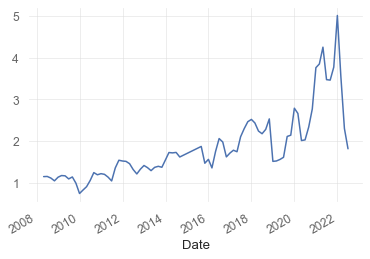

In [391]:
synthetic_momentum_index.plot()

<AxesSubplot:xlabel='Date'>

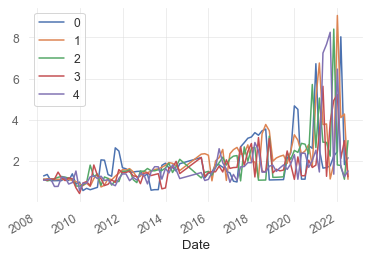

In [252]:
synthetic_momentum_data.plot()

<AxesSubplot:xlabel='Date'>

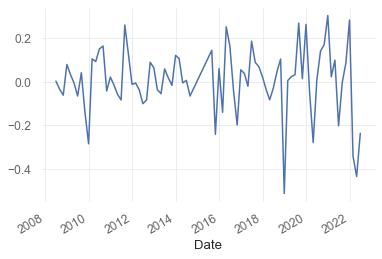

In [392]:
synthetic_momentum_returns.plot()

Construyo todos los índices

In [398]:
synthetic_momentum_index, synthetic_momentum_returns, synthetic_momentum_data = calcular_sintetico(cartera_momentum, precio_cero_resample)
synthetic_sharpe_index, synthetic_sharpe_returns, synthetic_sharpe_data = calcular_sintetico(cartera_sharpe, precio_cero_resample)
synthetic_media_index, synthetic_media_returns, synthetic_media_data = calcular_sintetico(cartera_media, precio_cero_resample)
synthetic_alpha_index, synthetic_alpha_returns, synthetic_alpha_data = calcular_sintetico(cartera_alpha, precio_cero_resample)
synthetic_beta_index, synthetic_beta_returns, synthetic_beta_data = calcular_sintetico(cartera_beta, precio_cero_resample)

Construyo un df con mis índices

En primer lugar, tengo que calcular los retornos del EW

In [405]:
ew_index_base_cero

Date
2007-04-12    1.000000
2007-04-13    1.002255
2007-04-16    1.008118
2007-04-17    1.009830
2007-04-18    1.011164
                ...   
2022-06-06    2.702261
2022-06-07    2.723911
2022-06-08    2.697011
2022-06-09    2.654220
2022-06-10    2.603756
Length: 3820, dtype: float64

In [406]:
ew_index_base_cero_resample = ew_index_base_cero.resample('2M').last()

In [407]:
ew_index_base_cero_returns = np.log(ew_index_base_cero_resample).diff().dropna(axis=0)

In [408]:
indexes_returns = pd.DataFrame(ew_index_base_cero_returns, columns=['EW'])

In [409]:
indexes_returns

,EW
Date,
2007-06-30,-0.002027
2007-08-31,0.004007
2007-10-31,0.045385
2007-12-31,-0.012024
2008-02-29,-0.025940
...,...
2021-10-31,0.011364
2021-12-31,0.037987
2022-02-28,-0.059946


Meto los datos de mis índices sintéticos

In [410]:
indexes_returns['Momentum'] = synthetic_momentum_returns
indexes_returns['Media'] = synthetic_media_returns
indexes_returns['Sharpe'] = synthetic_sharpe_returns
indexes_returns['Alpha_Jensen'] = synthetic_alpha_returns
indexes_returns['Beta'] = synthetic_beta_returns

El problema que va a tener esto es que nos vamos a comer parte del histórico de datos...Quitando los NAs de los retornos, nos vamos a 2008

In [413]:
indexes_returns.dropna(axis=0)

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2008-06-30,-0.020978,0.003239,0.014609,-0.170239,-0.148849,-0.096899
2008-08-31,-0.006383,-0.033795,-0.016328,0.033681,-0.241421,-0.154014
2008-10-31,-0.171004,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374
2008-12-31,0.045479,0.079551,0.104349,-0.008240,-0.008240,-0.106012
2009-02-28,-0.098335,0.034294,-0.009531,0.595792,-0.168763,-0.232094
...,...,...,...,...,...,...
2021-10-31,0.011364,0.085926,0.028249,0.387523,0.408428,0.172687
2021-12-31,0.037987,0.283631,0.038885,-0.429131,-0.365573,0.198760
2022-02-28,-0.059946,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392


<AxesSubplot:xlabel='Date'>

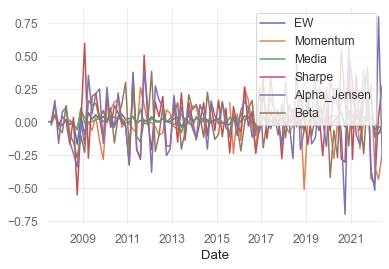

In [414]:
indexes_returns.plot()

Miro los índices con precio para comparar

In [415]:
indexes_precio = pd.DataFrame(ew_index_base_cero, columns=['EW'])
indexes_precio['Momentum'] = synthetic_momentum_index
indexes_precio['Media'] = synthetic_media_index
indexes_precio['Sharpe'] = synthetic_sharpe_index
indexes_precio['Alpha_Jensen'] = synthetic_alpha_index
indexes_precio['Beta'] = synthetic_beta_index
indexes_precio.dropna(axis=0, inplace=True)

In [416]:
indexes_precio.head()

,EW,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,,
2008-04-30,1.041298,1.151450,1.142141,1.134964,1.184384,1.030316
2008-06-30,1.019681,1.155185,1.158948,0.957300,1.020582,0.935164
2008-10-31,0.853938,1.050164,1.080165,0.569393,0.569393,0.609314
2008-12-31,0.893671,1.137119,1.198970,0.564721,0.564721,0.548026
2009-04-30,0.867622,1.170333,1.184183,0.777993,0.678879,0.510605


<AxesSubplot:xlabel='Date'>

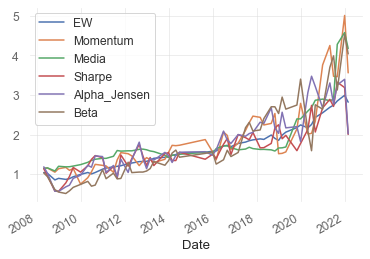

In [417]:
indexes_precio.plot()

Correlación índice-features

In [418]:
indexes_returns.columns

Index(['EW', 'Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta'], dtype='object')

In [420]:
features = ['Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta']

In [421]:
for feature in features:
    r2 = indexes_returns[feature].corr(indexes_returns['EW'])
    print(f'El r2 de de EW con {feature} es {r2:.2f}')

El r2 de de EW con Momentum es 0.27
El r2 de de EW con Media es 0.34
El r2 de de EW con Sharpe es 0.17
El r2 de de EW con Alpha_Jensen es 0.28
El r2 de de EW con Beta es 0.42


Debido al ruido de los retornos, recuerda que una correlacion >0.2 o 0.3 es una correlación buena. Esto significa que una aproximación podría ser eliminar de las features el ratio de sharpe y quedarnos con las demás, que explican mejor la evolución de los retornos del índice

Valorar graficar las distribuciones y su corr

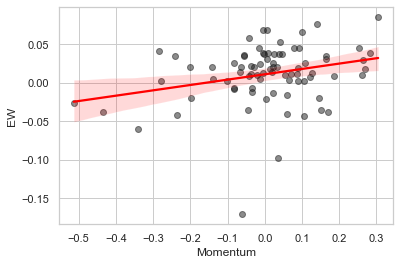

In [423]:
import seaborn as sns
sns.set(style='whitegrid')

graph = sns.regplot(x='Momentum', y='EW', data=indexes_returns,
                    line_kws={"color":'red'},
                    scatter_kws={"color":"k", 'alpha': .5})


## Multicolinealidad

Ahora vamos a ver si las features se superponen o añaden información redundante.

In [429]:
indexes_returns.corr()['EW'][1:]

Momentum        0.274591
Media           0.337588
Sharpe          0.173422
Alpha_Jensen    0.283089
Beta            0.420531
Name: EW, dtype: float64

Calculo la media

In [428]:
indexes_returns.corr()['EW'][1:].abs().mean()

0.29784405233956557

La correlación es alta, teniendo en cuenta la cantidad de ruido blando que hay en los datos y que no responden una causa contreta y explicable.

Ahora, vamos a analizar si hay multicolinealidad. Necesitamos un espectro amplio de features teniendo en cuanta que las correlaciones como hemos visto son aceptables, pero no altas. La idea aquí tiene que ser encontrar distintas características que puedan explicar los retornos del ínidice y que sean complementarias. Esto dará robustez a la estrategia, puesto que en conjunto tendrán una correlación mayor que explicará mejor la evolución del índice.

En la liteartur he encontrado que se utiliza  el Factor de Infalción de la Varianza (FIV), que es una medida de la corr de cada feature con el resto. Buscamos valores bajos de este indicador, porque esto significa que no está correlacionado con los demás

Fórmula: VIF = 1/(1-R2)
https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html
https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

Vamos a usar statsmodel

In [443]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cojo todas las columnas excepto 'EW'. Me interesa ver cómo se correlacionan las features entre ellas
features_fiv = indexes_returns.iloc[:, 1:].dropna(axis=0)
cols = features_fiv.columns

In [440]:
features_fiv

,Momentum,Media,Sharpe,Alpha_Jensen,Beta
Date,,,,,
2008-06-30,0.003239,0.014609,-0.170239,-0.148849,-0.096899
2008-08-31,-0.033795,-0.016328,0.033681,-0.241421,-0.154014
2008-10-31,-0.061519,-0.054071,-0.553227,-0.342137,-0.274374
2008-12-31,0.079551,0.104349,-0.008240,-0.008240,-0.106012
2009-02-28,0.034294,-0.009531,0.595792,-0.168763,-0.232094
...,...,...,...,...,...
2021-10-31,0.085926,0.028249,0.387523,0.408428,0.172687
2021-12-31,0.283631,0.038885,-0.429131,-0.365573,0.198760
2022-02-28,-0.341721,-0.091950,-0.464036,-0.519579,-0.115392


In [444]:
VIF = [variance_inflation_factor(features_fiv.values, i) for i in range(len(features_fiv.columns))]

In [445]:
VIF_df = pd.DataFrame(zip(cols, VIF), columns=['feature', 'VIF']).set_index('feature')

In [446]:
VIF_df

,VIF
feature,
Momentum,1.087007
Media,1.052350
Sharpe,1.368363
Alpha_Jensen,1.332030
Beta,1.058873


Esto mes está diciendo que mis features son independientes y no le voy a meter a la red información redundante. Según la teoría, un VIF en el entorno de la unidad, indica ausnecia de colinealidad con el resto y se puede considerar independiente.

Referencia para entender los valores
https://www.statisticshowto.com/variance-inflation-factor/

Finalmente, voy a graficar mediante mapa de calor las correlaciones entre features

<AxesSubplot:>

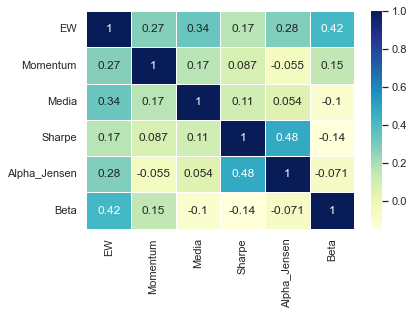

In [450]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(indexes_returns.corr(), annot=True, linewidths=1, cmap="YlGnBu")

## Autorregresión

In [459]:
n_rows = 2
n_col = len(indexes_returns.columns)//2

In [460]:
n_col

3

In [466]:
indexes_returns.columns[1:]

Index(['Momentum', 'Media', 'Sharpe', 'Alpha_Jensen', 'Beta'], dtype='object')

In [467]:
indexes_returns['Media']

Date
2007-06-30         NaN
2007-08-31         NaN
2007-10-31         NaN
2007-12-31         NaN
2008-02-29         NaN
                ...   
2021-10-31    0.028249
2021-12-31    0.038885
2022-02-28   -0.091950
2022-04-30   -0.086867
2022-06-30   -0.071289
Freq: 2M, Name: Media, Length: 91, dtype: float64

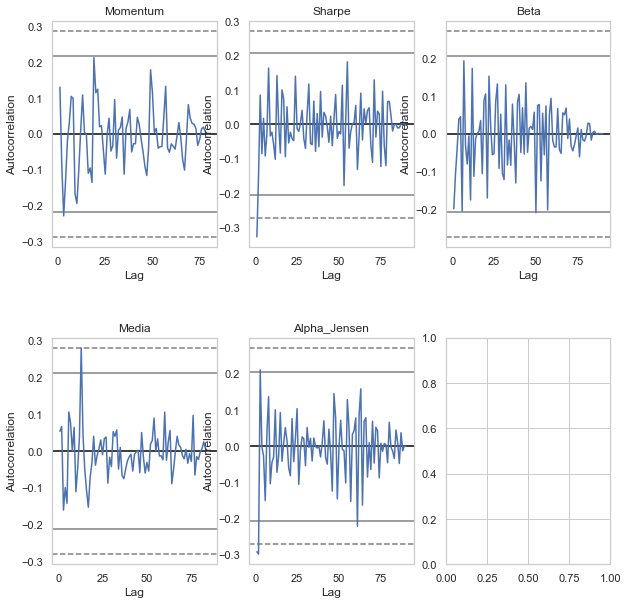

In [468]:
fig, ax = plt.subplots(figsize=(10, 10), ncols= n_col, nrows=n_rows)
for i, feature in enumerate(indexes_returns.columns[1:]):
    # Con r y c me muevo por filas y columnas del subplot
    r = i%2
    c = i//2
    # Plot
    pd.plotting.autocorrelation_plot(indexes_returns[feature].dropna(axis=0), ax=ax[r][c])
    ax[r][c].set_title(feature)

# Los separo
plt.subplots_adjust(hspace=0.4)



https://www.investopedia.com/terms/a/autoregressive.asp

Esto significa que no puedo predecir el futuro en base a lo ocurrido en el pasado porque no hay patrones estacionales?? Los retornos pasados no explican los retornos futuros.

In [470]:
indexes_returns.shape[0]

91

Valora si quieres comparar los estadísticos de las distribuciones (sigma, kurtosis....)